In [272]:
import torch
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap


In [287]:
cmap = ListedColormap(["C0", "C1"])

In [295]:
l = torch.nn.Conv2d(1, 1, 3, bias=False, padding=1)

In [296]:
l._parameters["weight"].data = torch.ones(1,1,3,3)

In [279]:
torch.bernoulli(0.5*torch.ones(1))

tensor([1.])

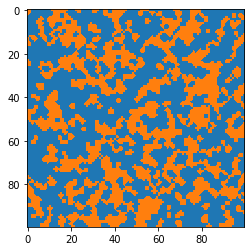

In [367]:
# Single coin flip who wins

N_grid = 100
grid = torch.randint(0, 2,(N_grid, N_grid)).float()*2-1

param = 0.6

for i in range(1000):
    old_grid = grid.clone()
    neighbor_sum = l(grid.unsqueeze(0)).detach().squeeze()

    p = torch.bernoulli(param*torch.ones(1))
    if p == 0.:
        mask = neighbor_sum > 1
        grid[mask] = 1.
    else:
        mask = neighbor_sum < -1
        grid[mask] = -1.

    if torch.sum((grid-old_grid).abs()) == 0.:
        break

plt.imshow(grid, cmap=cmap)
plt.show()


In [417]:
predator_count

tensor([[3., 3., 2.,  ..., 3., 2., 0.],
        [4., 4., 3.,  ..., 4., 4., 1.],
        [2., 3., 3.,  ..., 4., 5., 3.],
        ...,
        [1., 1., 1.,  ..., 4., 5., 4.],
        [0., 1., 1.,  ..., 3., 4., 2.],
        [0., 1., 1.,  ..., 3., 3., 1.]], grad_fn=<SqueezeBackward0>)

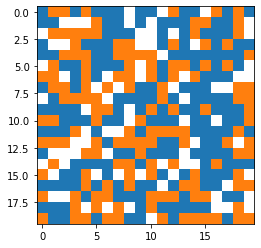

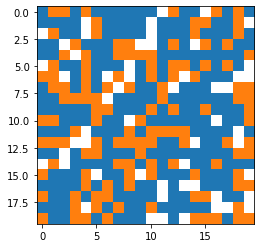

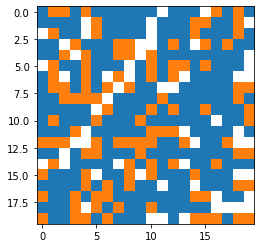

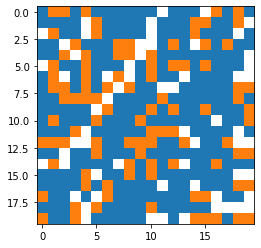

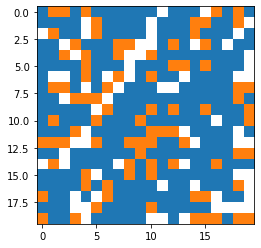

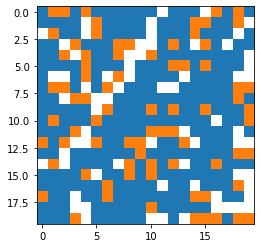

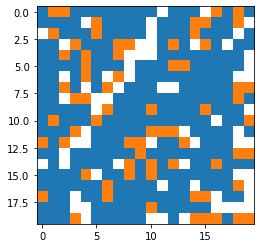

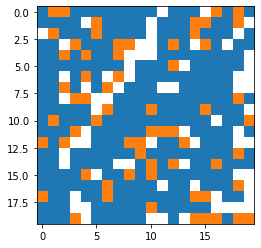

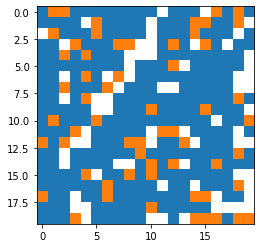

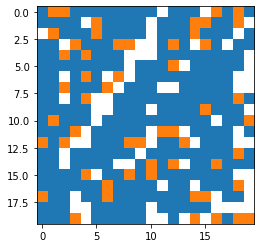

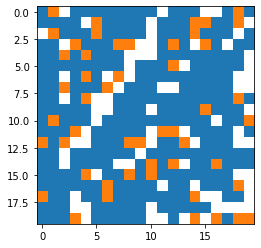

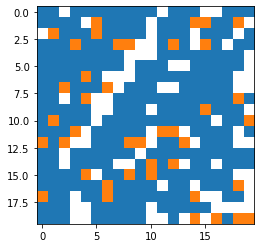

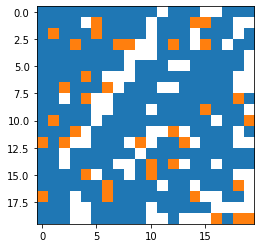

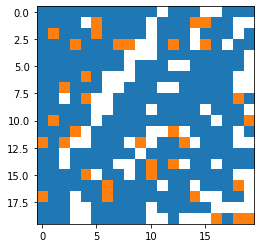

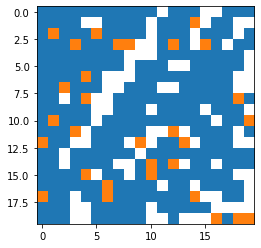

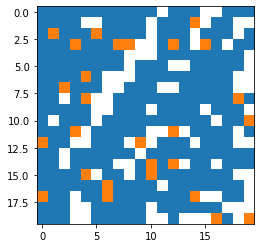

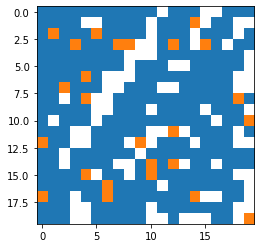

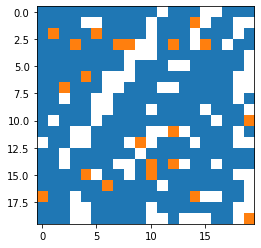

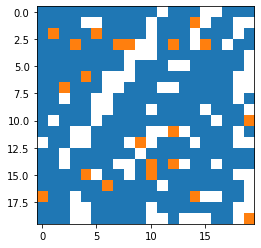

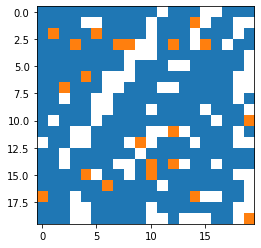

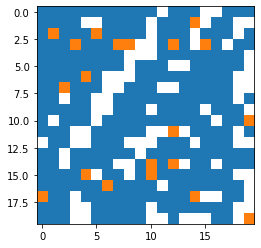

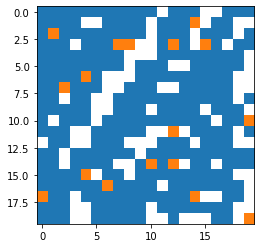

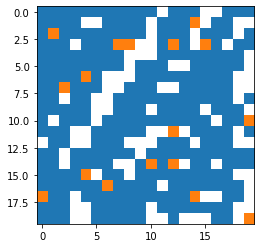

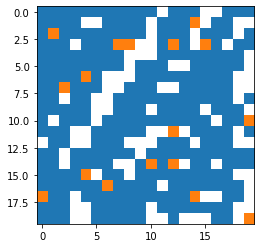

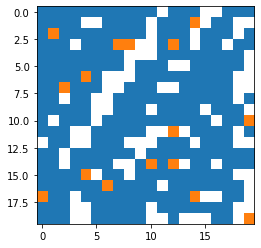

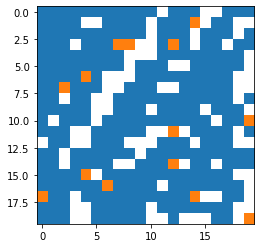

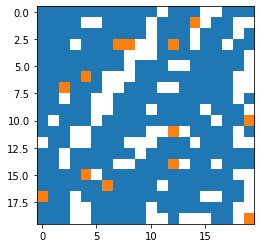

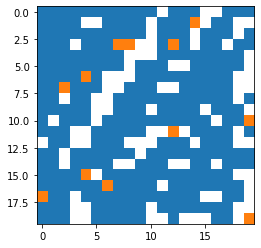

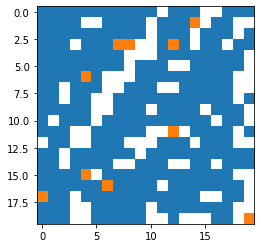

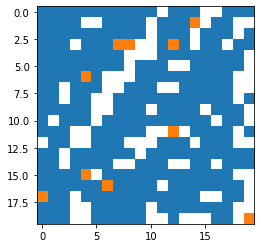

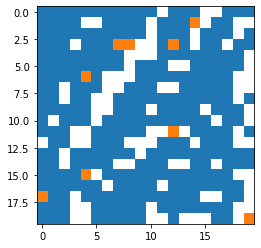

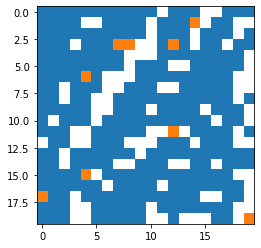

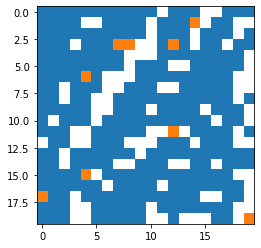

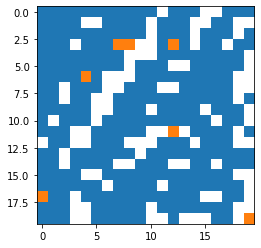

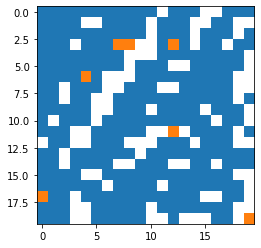

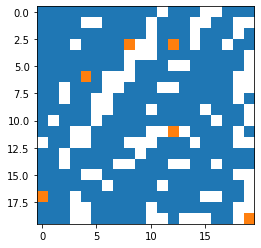

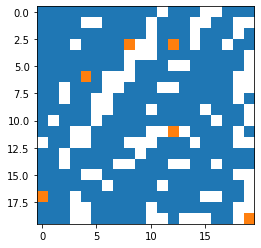

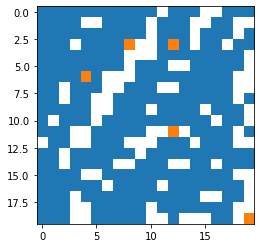

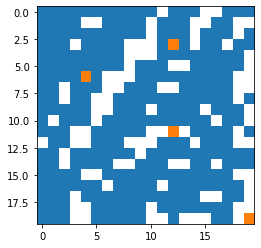

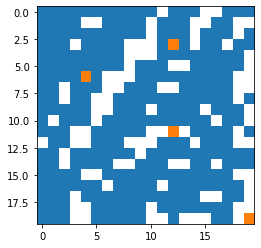

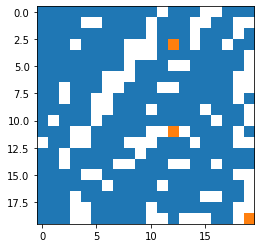

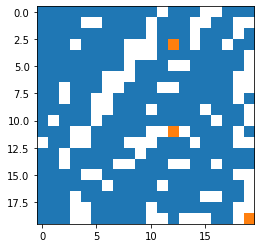

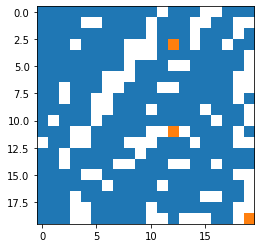

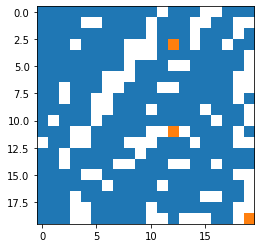

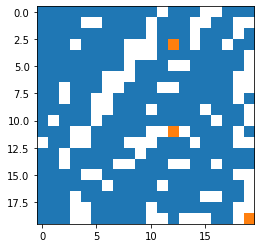

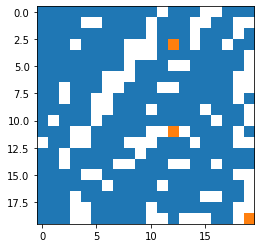

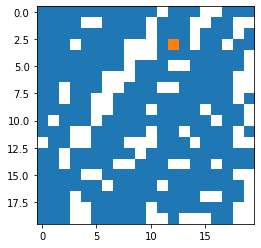

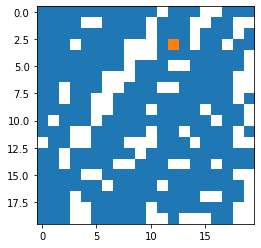

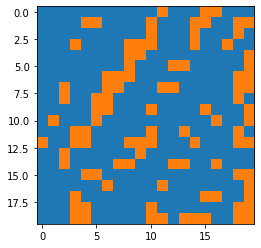

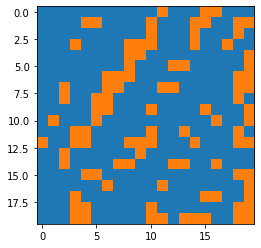

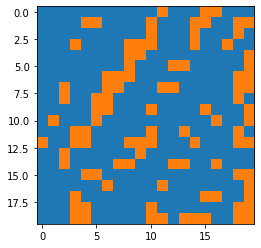

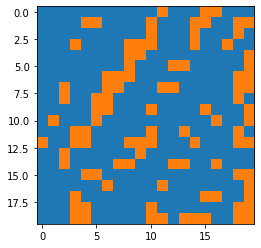

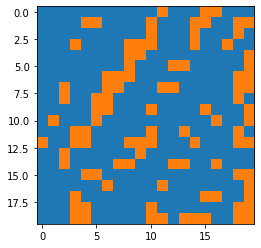

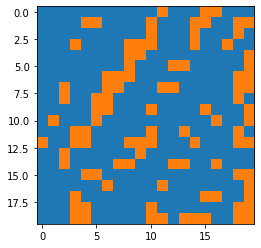

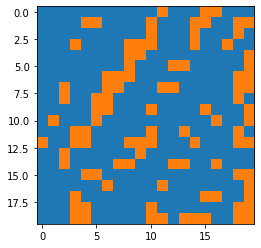

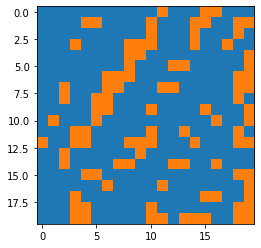

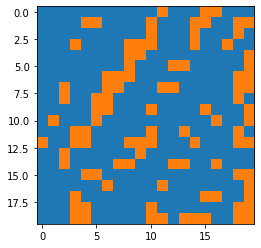

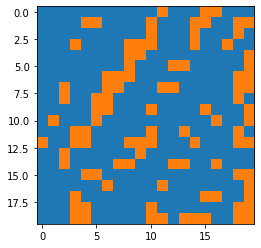

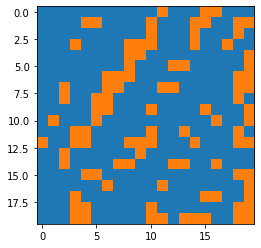

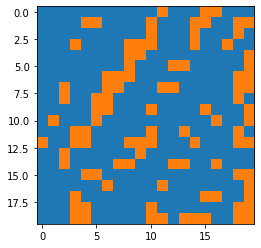

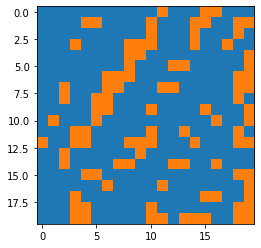

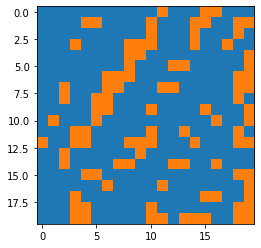

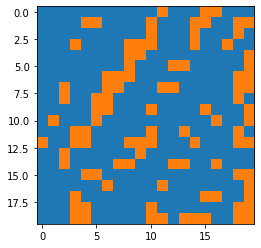

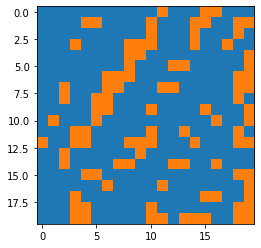

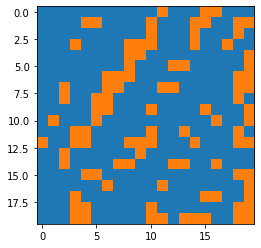

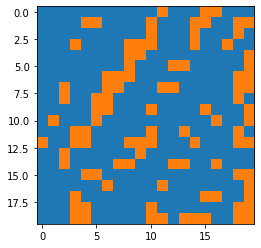

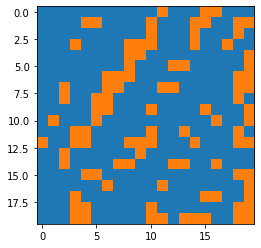

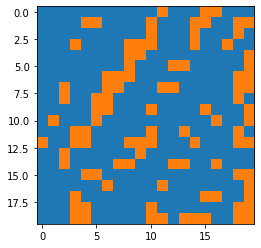

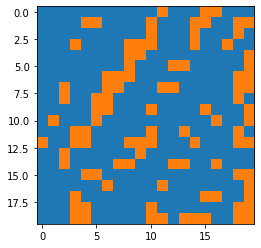

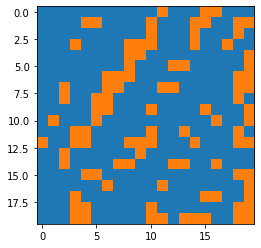

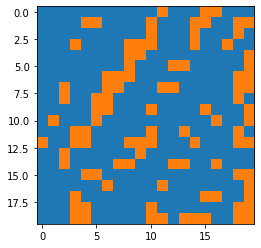

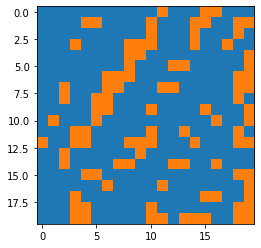

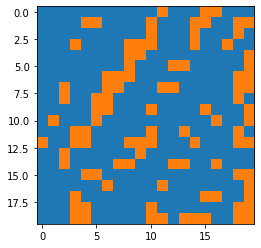

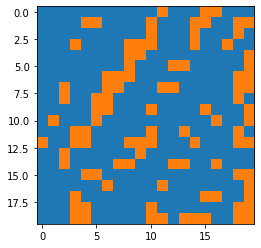

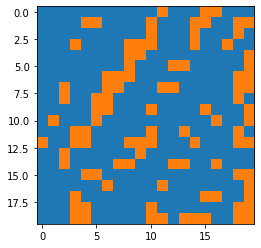

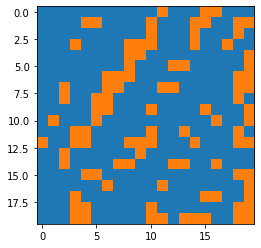

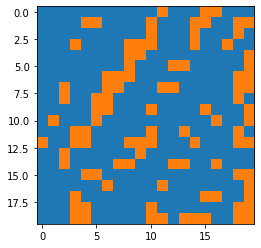

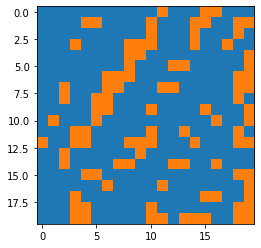

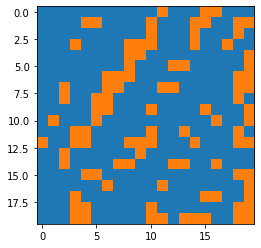

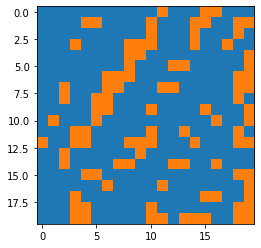

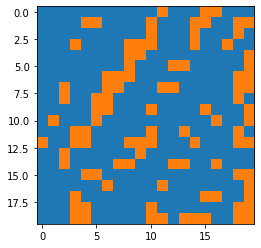

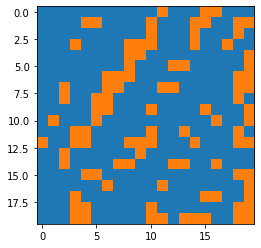

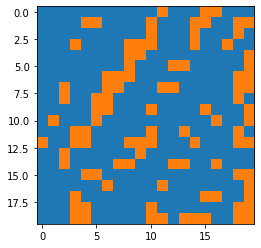

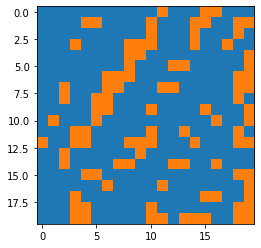

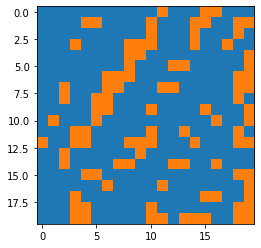

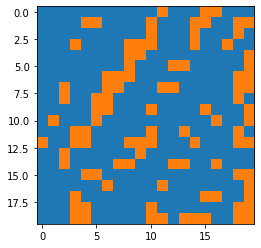

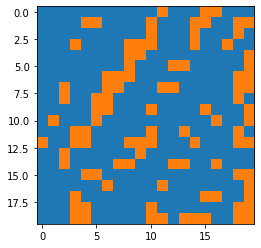

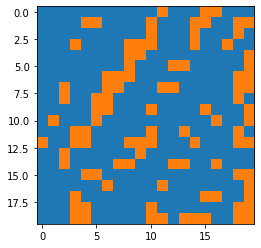

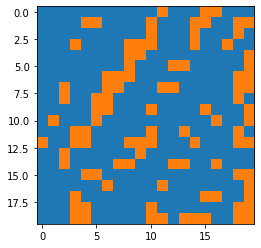

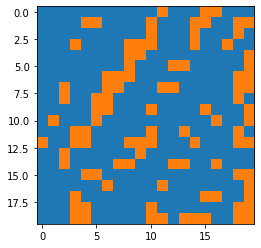

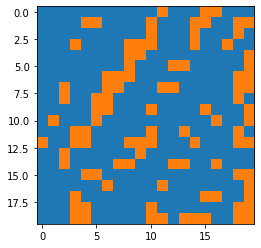

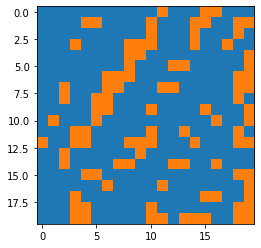

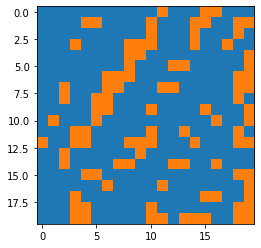

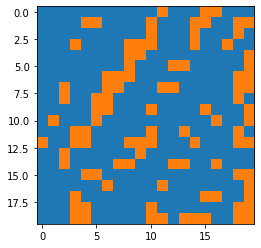

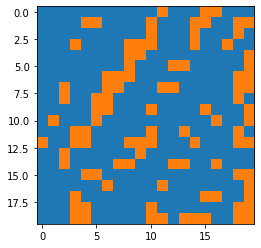

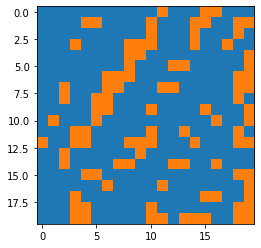

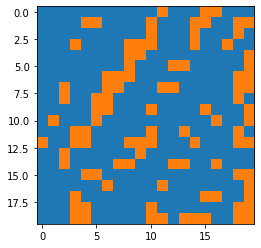

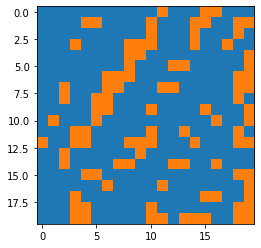

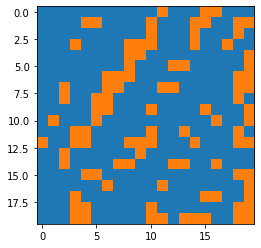

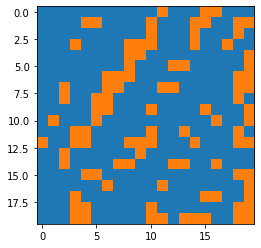

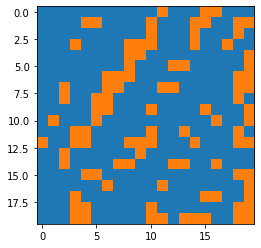

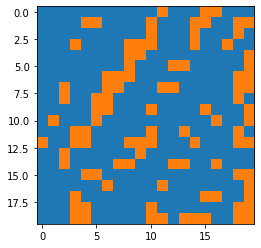

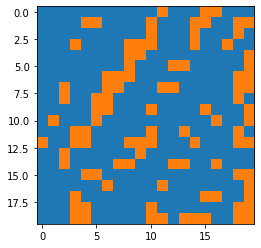

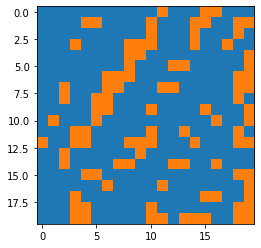

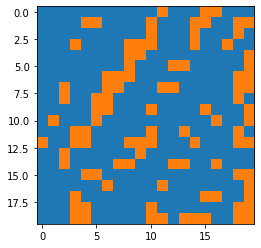

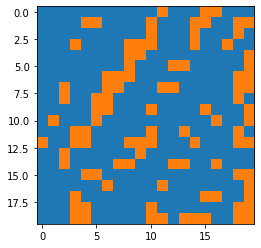

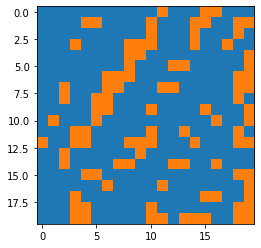

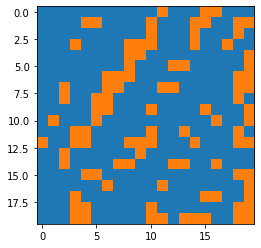

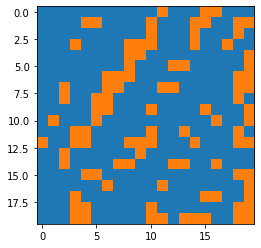

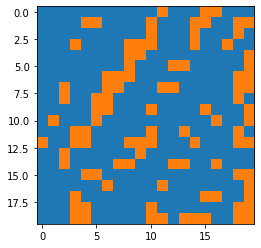

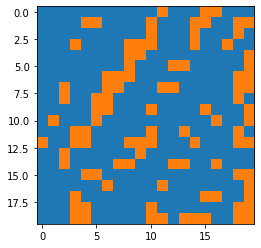

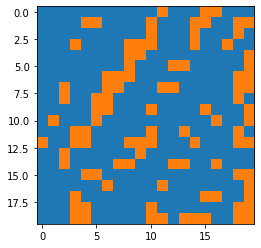

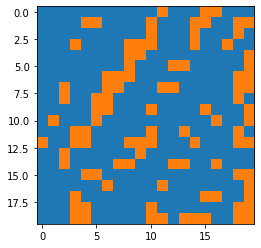

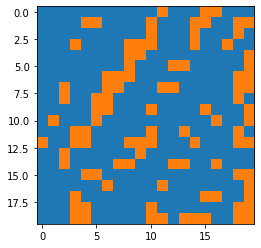

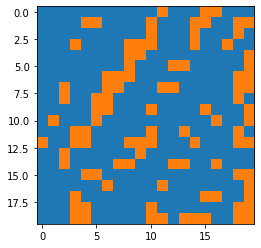

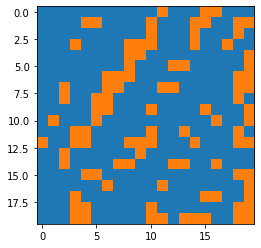

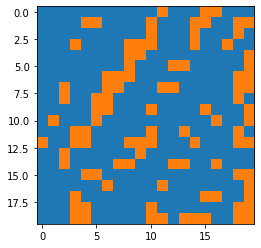

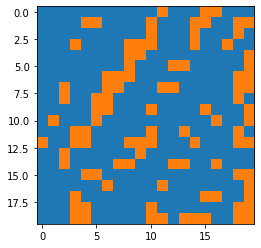

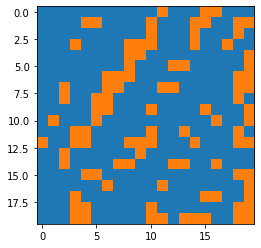

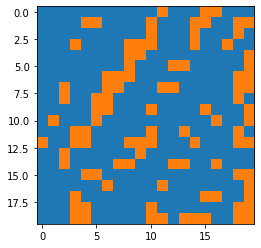

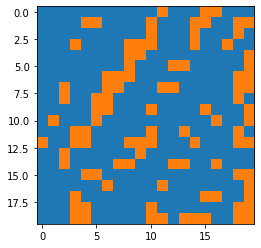

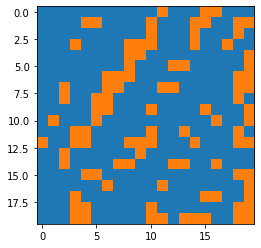

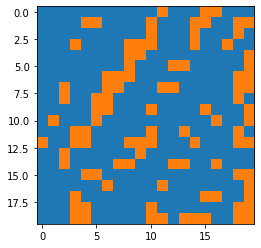

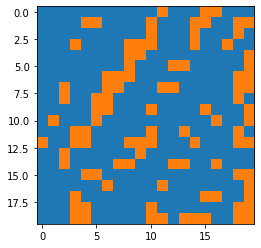

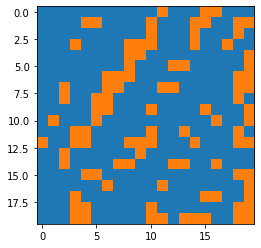

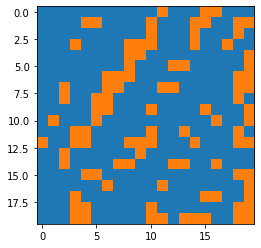

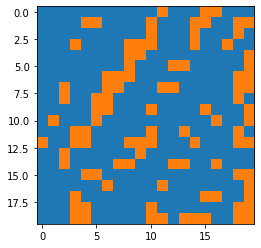

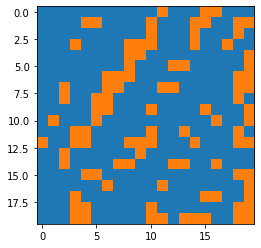

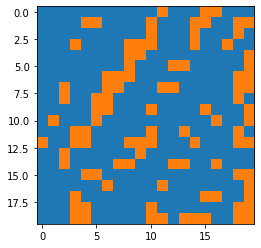

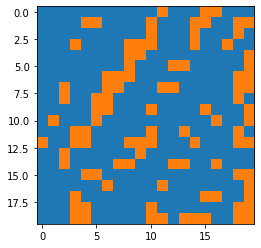

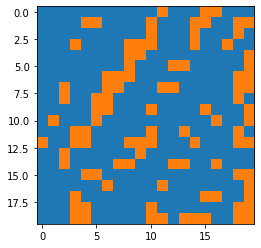

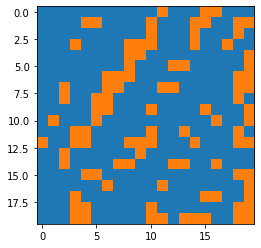

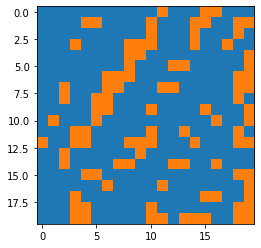

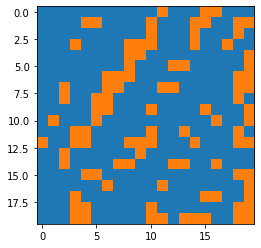

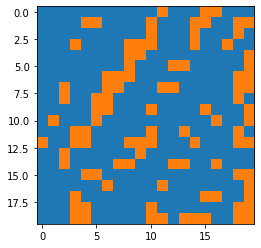

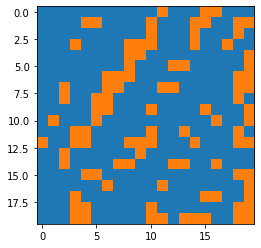

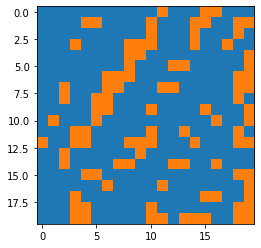

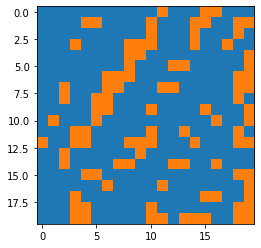

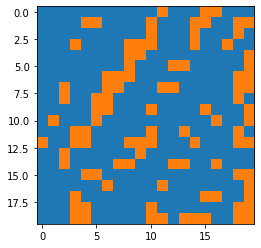

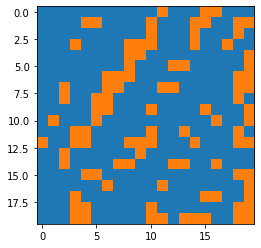

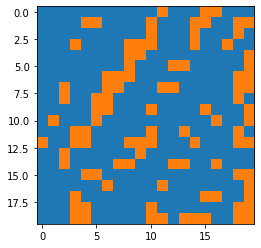

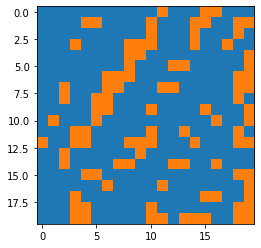

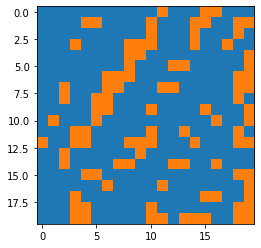

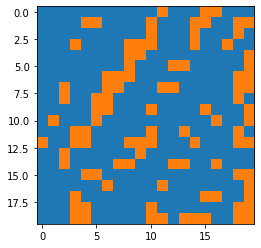

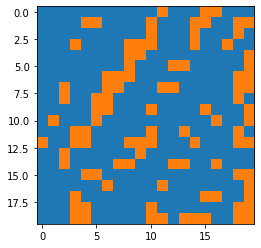

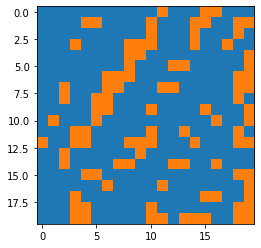

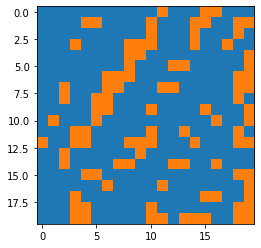

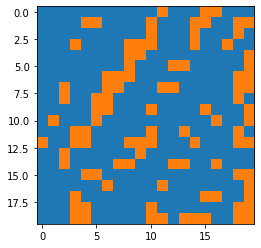

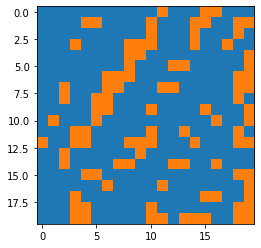

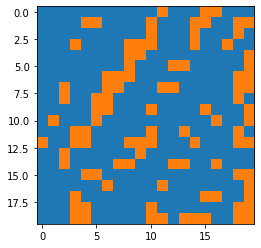

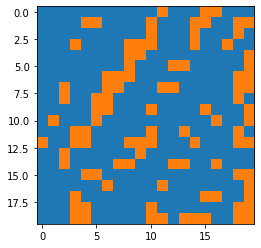

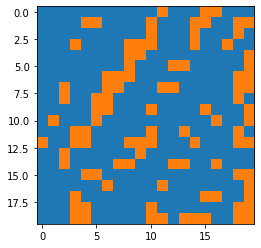

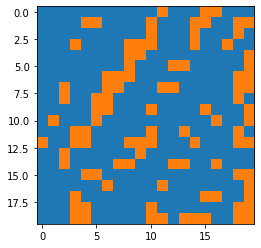

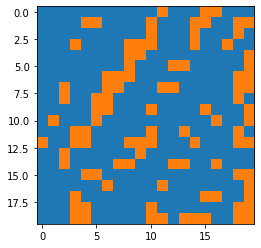

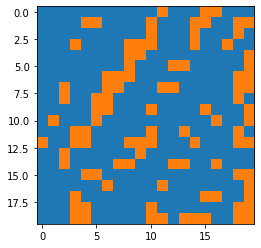

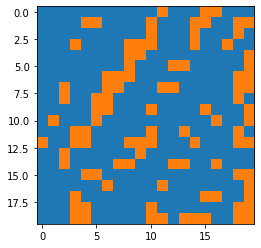

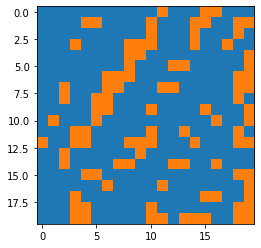

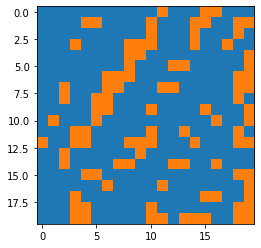

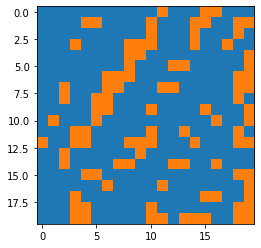

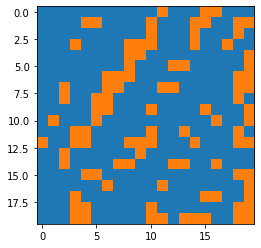

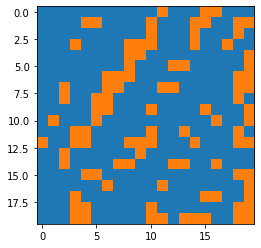

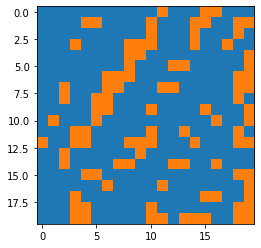

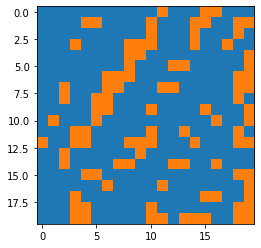

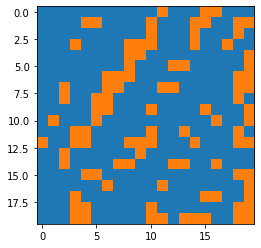

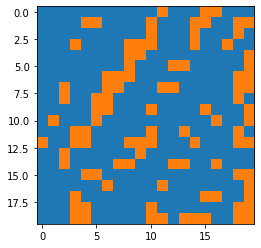

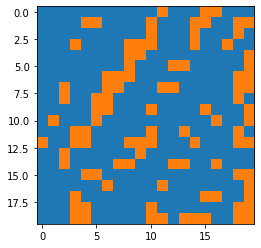

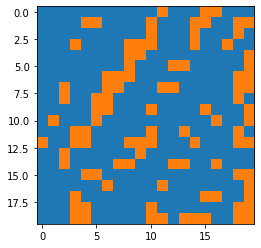

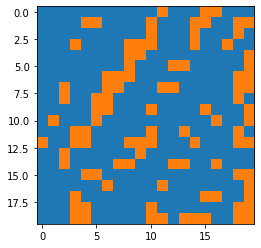

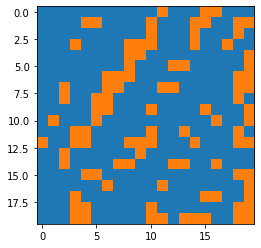

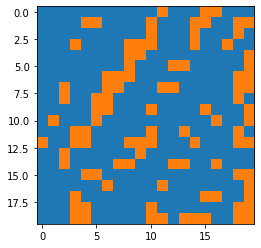

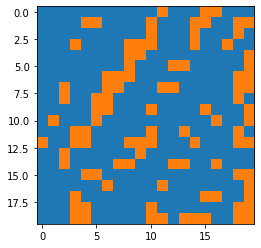

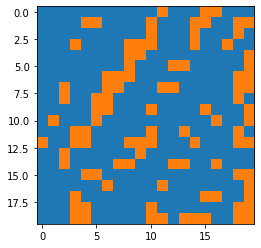

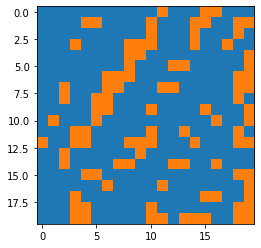

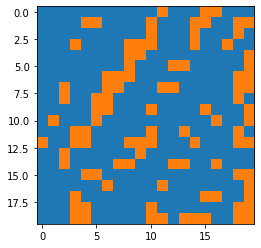

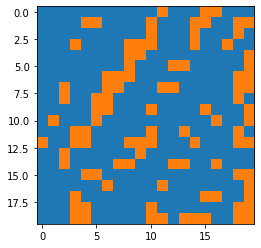

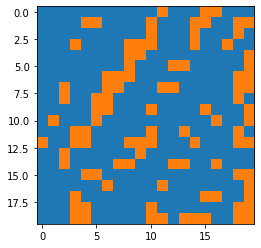

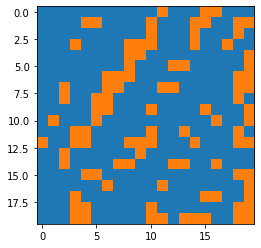

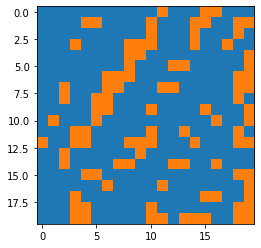

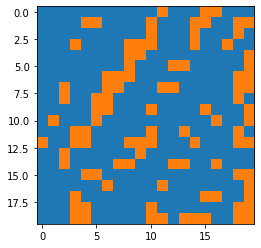

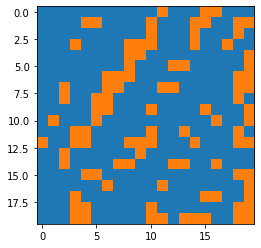

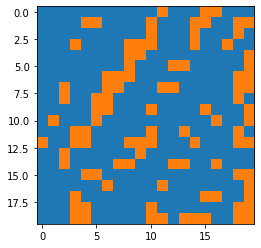

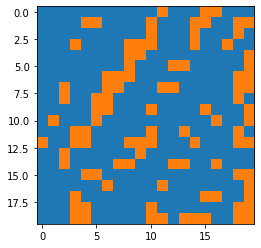

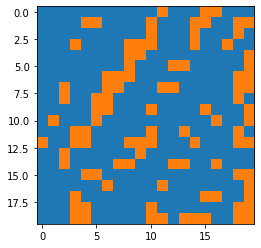

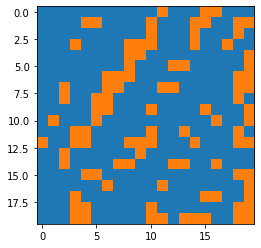

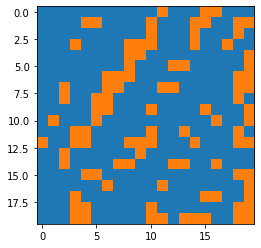

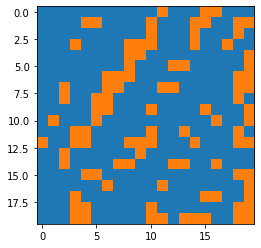

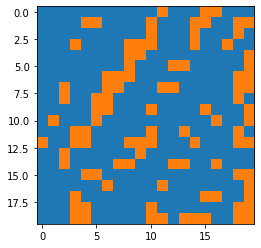

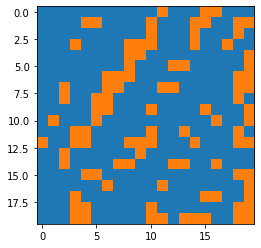

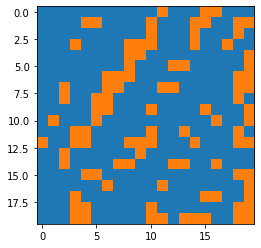

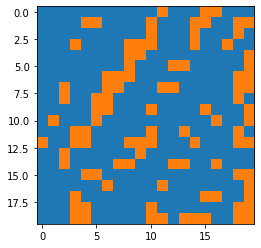

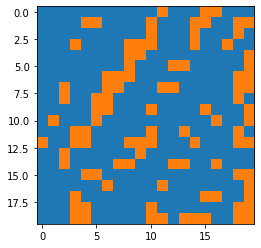

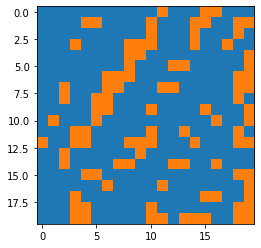

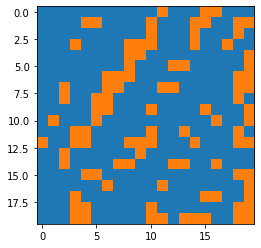

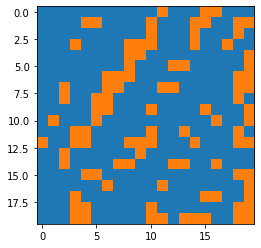

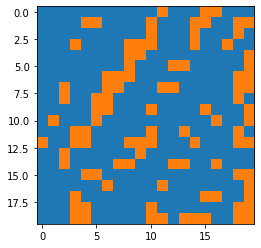

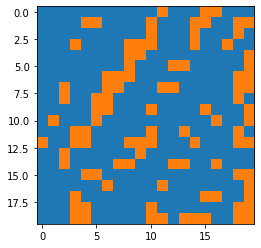

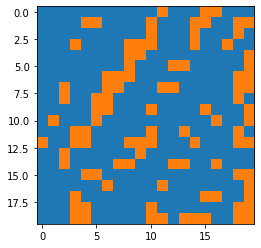

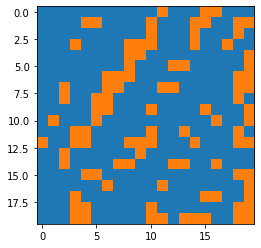

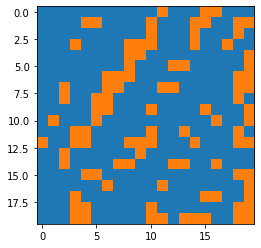

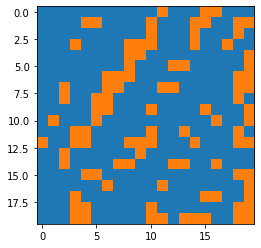

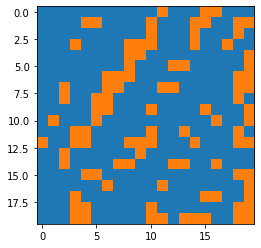

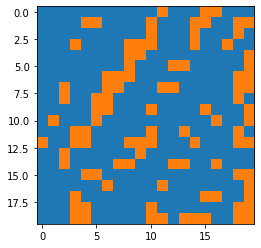

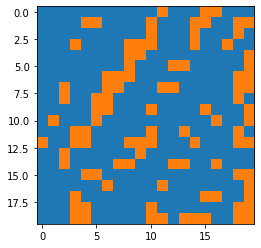

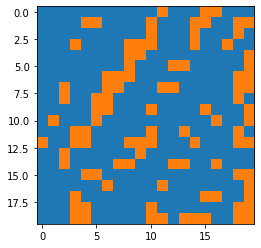

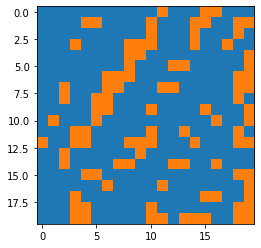

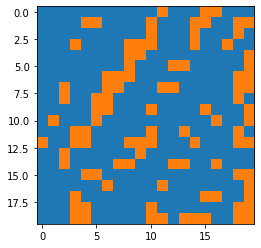

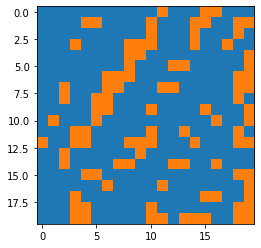

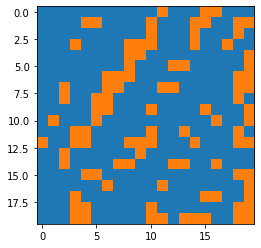

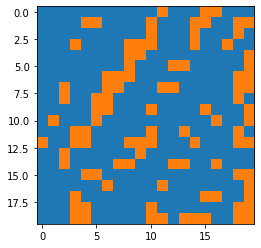

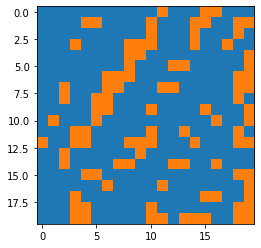

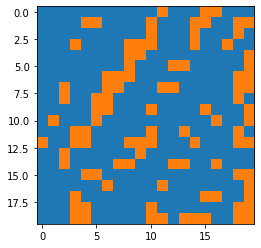

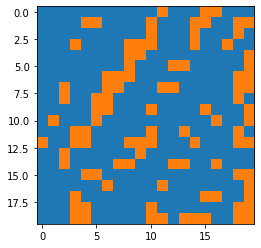

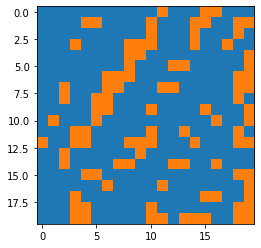

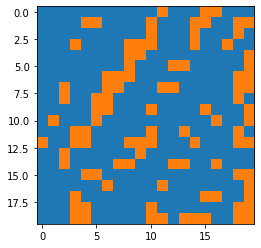

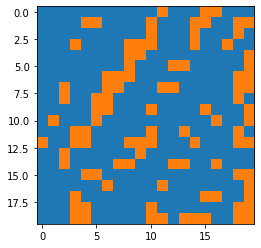

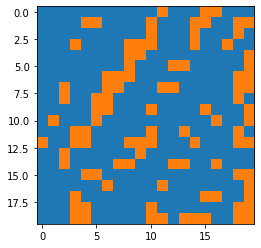

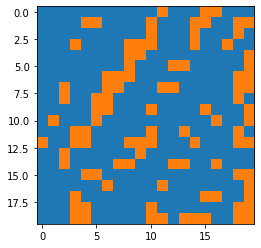

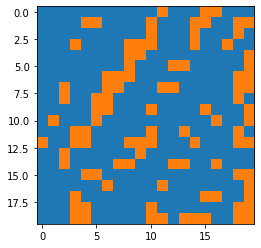

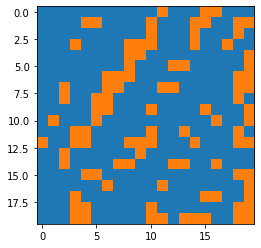

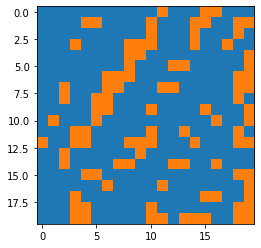

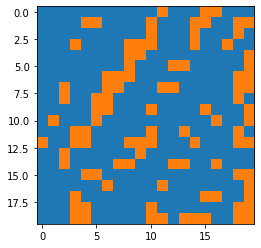

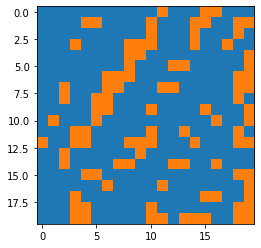

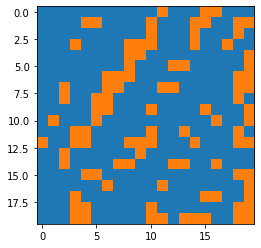

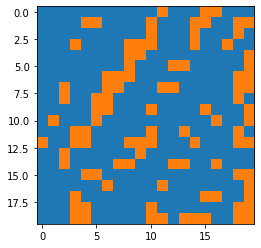

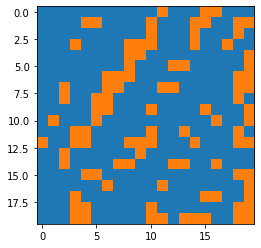

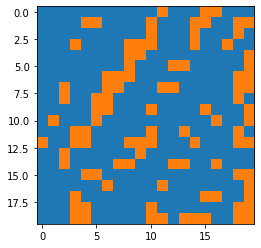

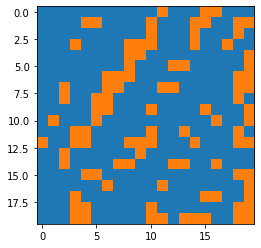

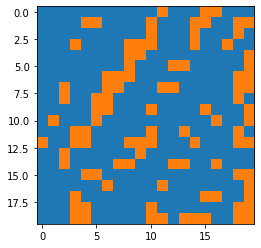

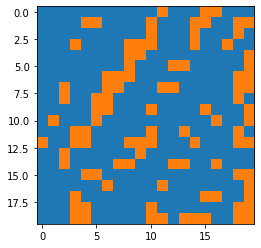

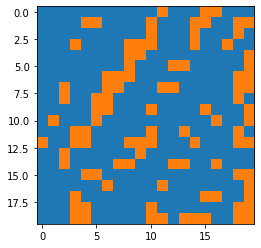

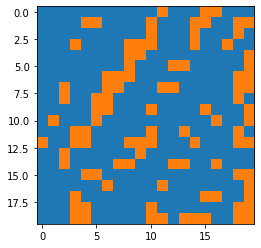

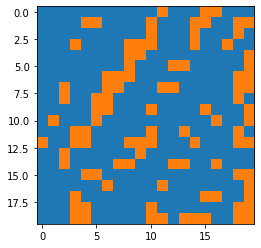

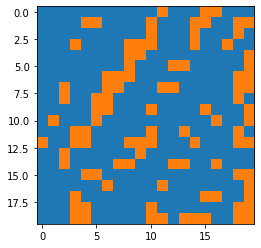

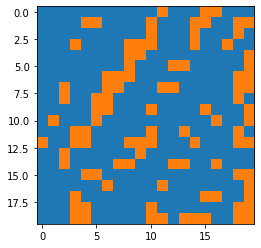

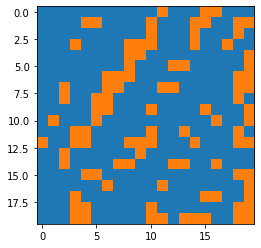

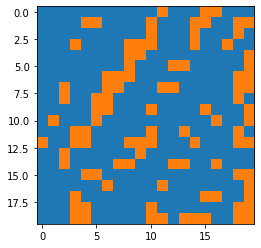

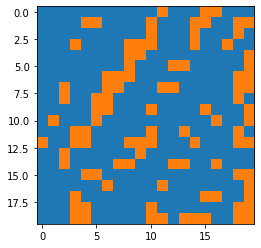

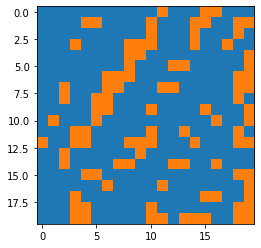

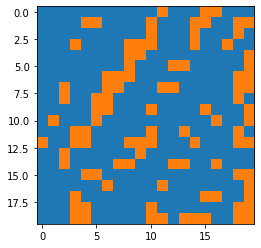

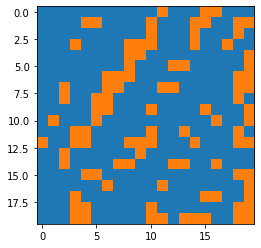

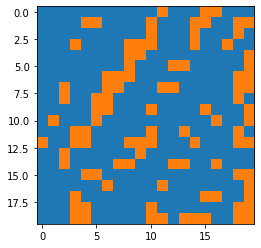

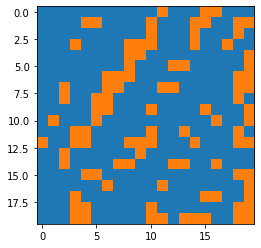

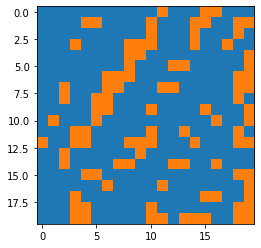

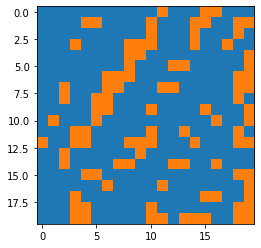

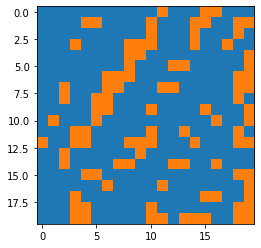

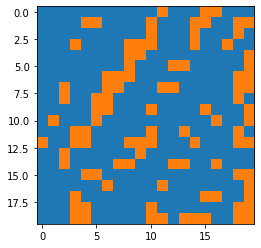

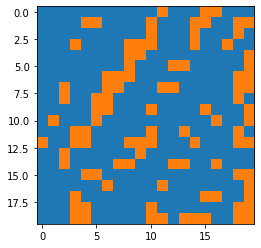

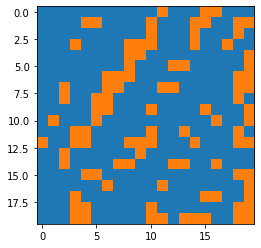

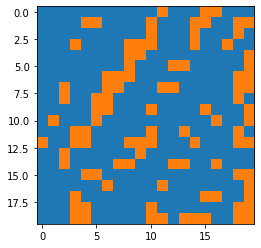

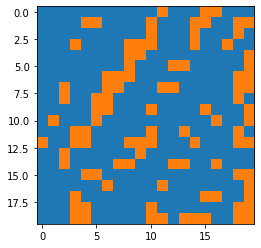

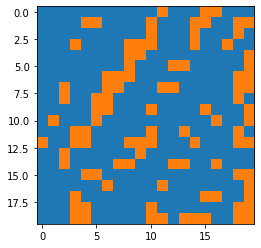

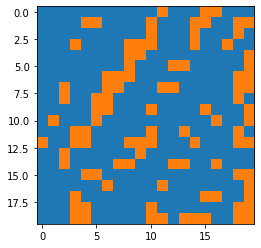

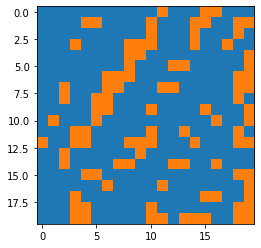

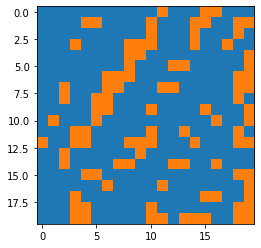

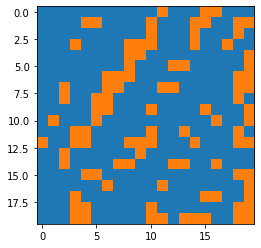

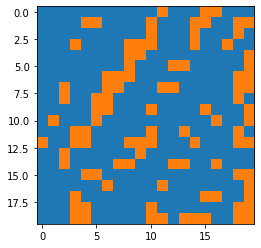

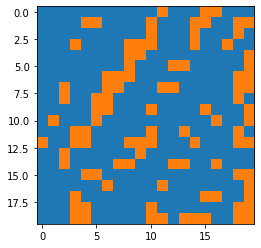

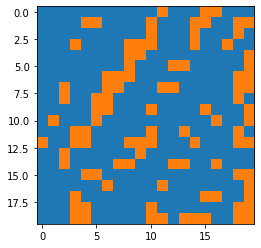

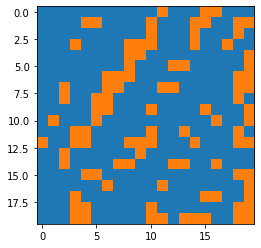

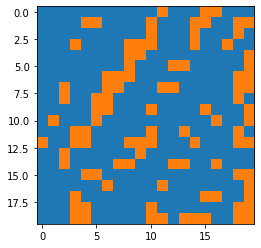

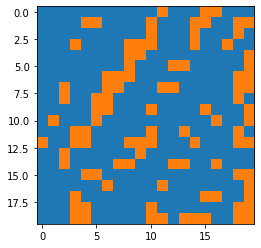

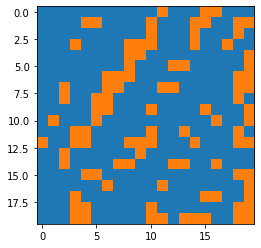

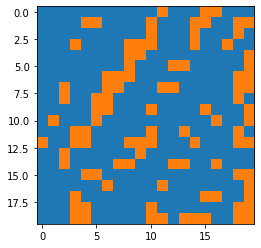

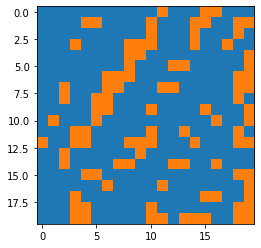

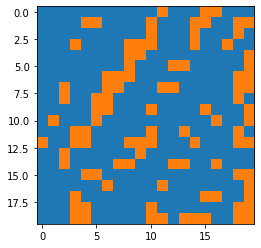

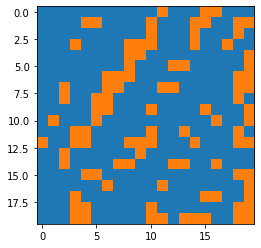

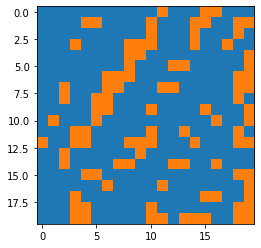

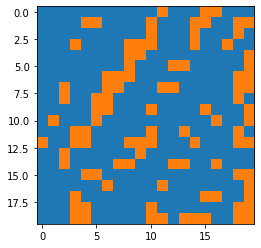

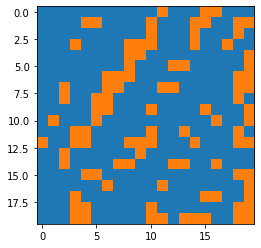

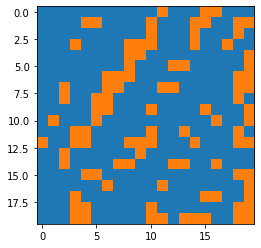

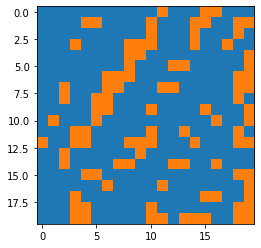

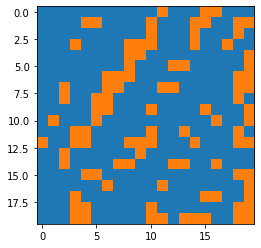

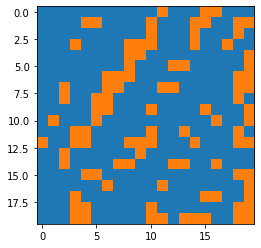

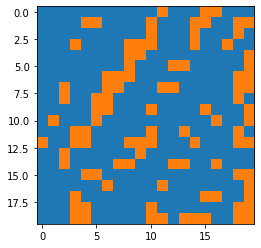

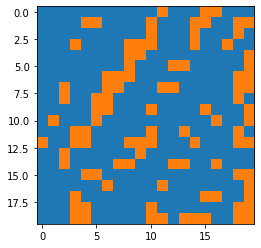

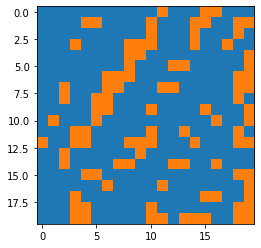

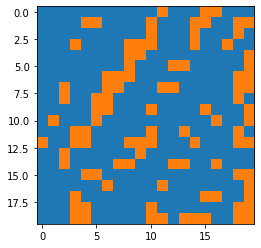

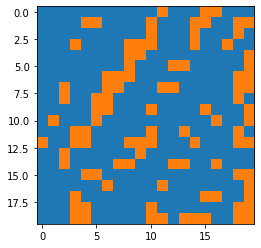

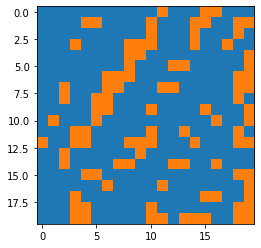

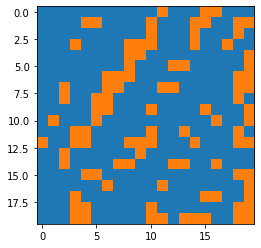

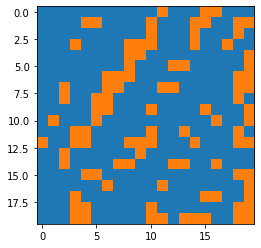

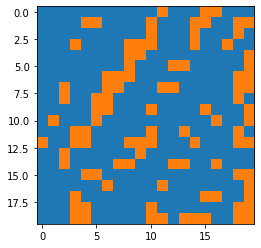

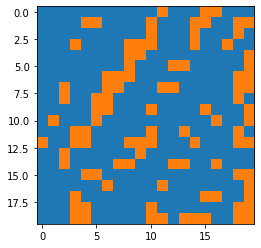

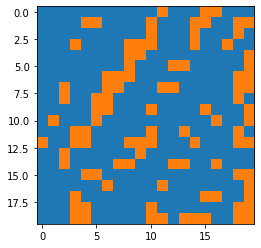

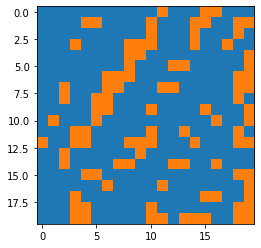

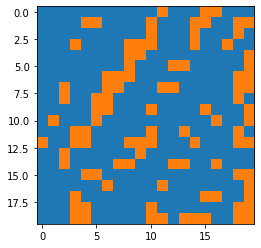

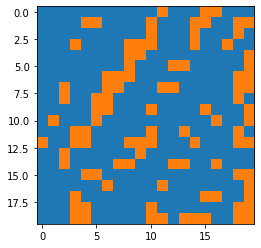

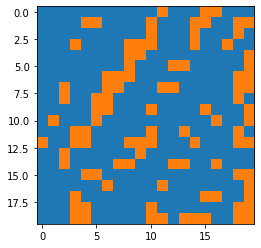

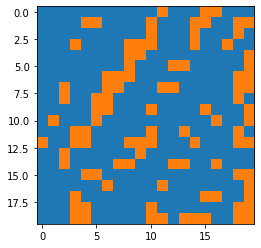

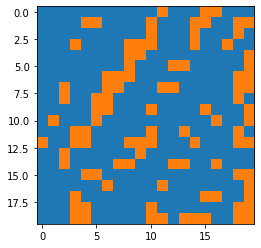

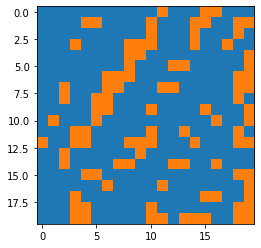

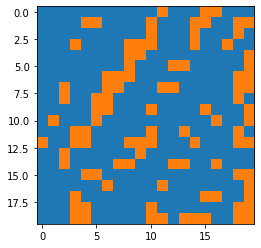

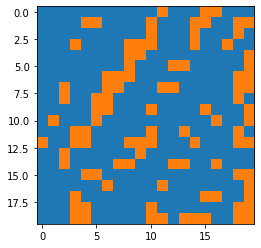

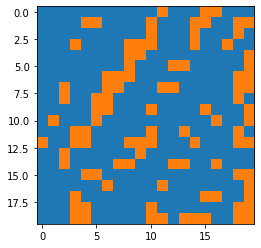

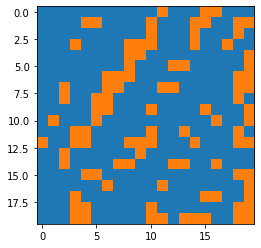

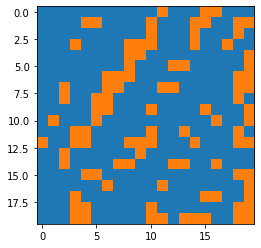

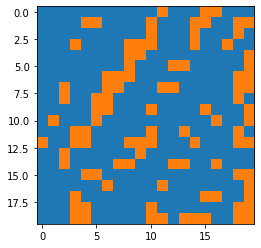

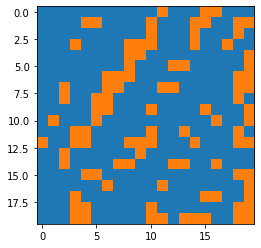

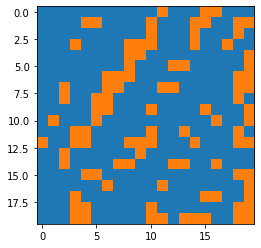

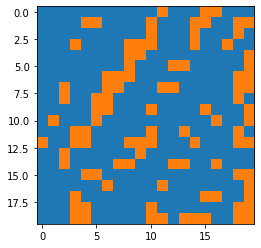

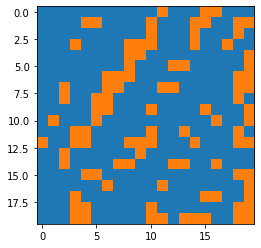

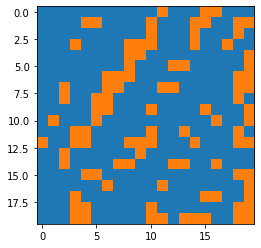

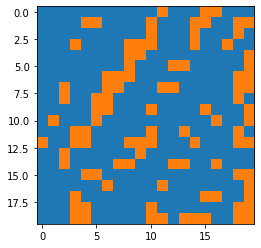

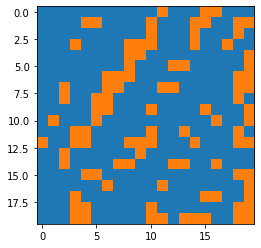

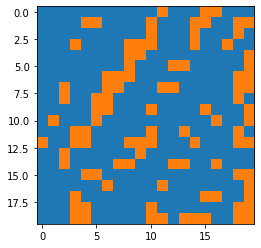

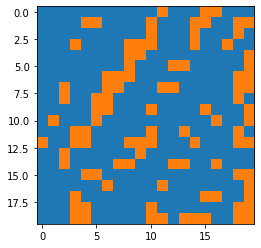

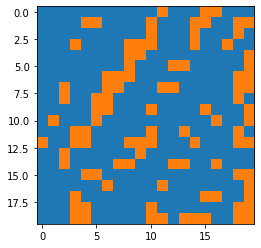

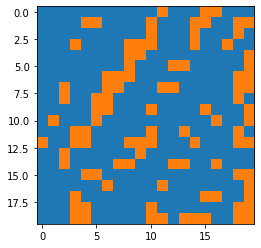

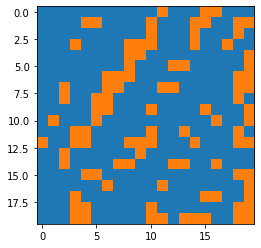

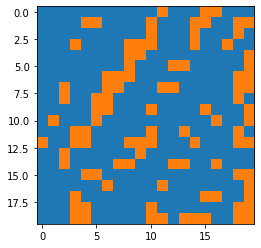

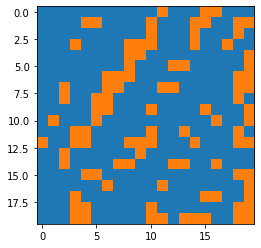

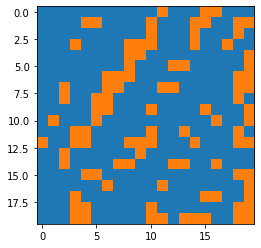

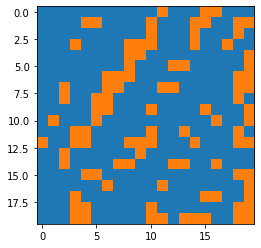

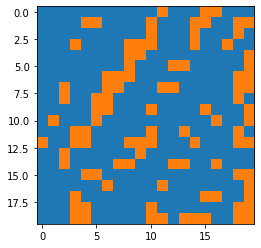

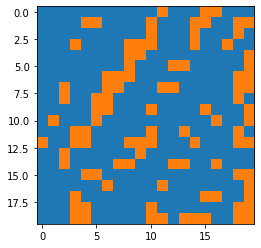

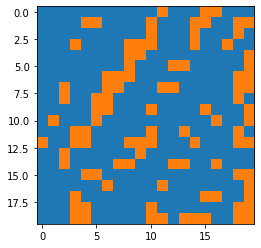

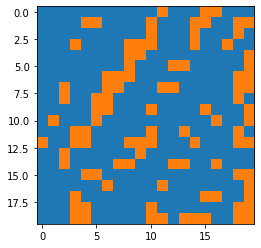

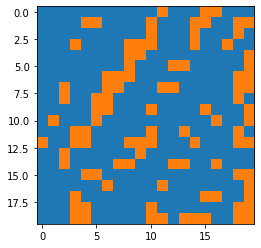

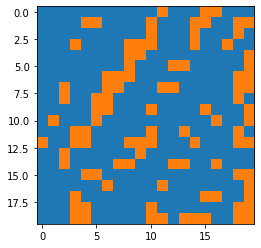

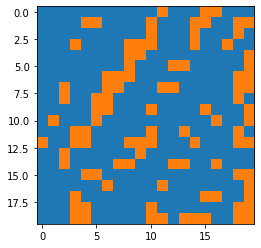

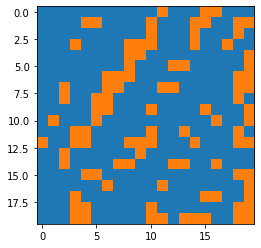

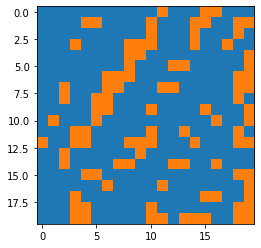

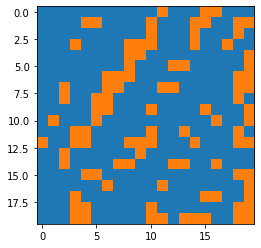

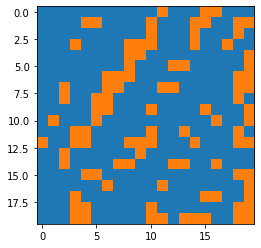

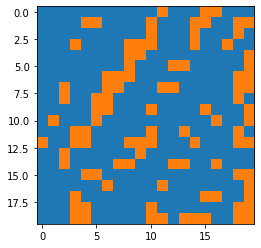

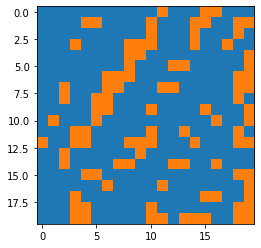

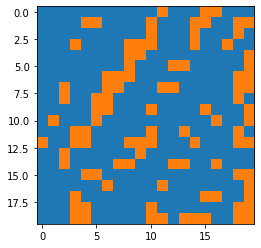

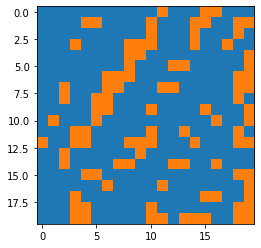

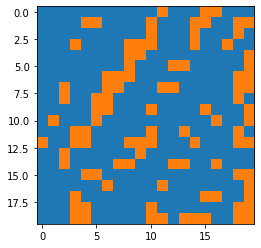

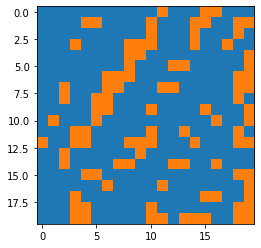

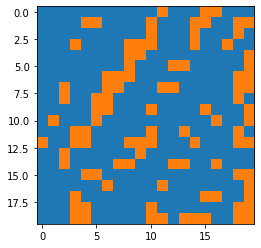

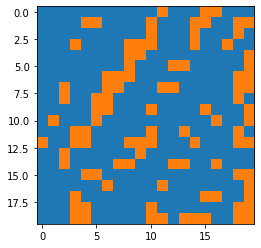

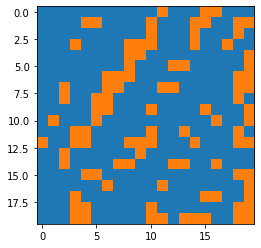

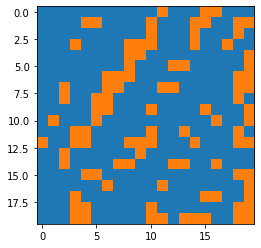

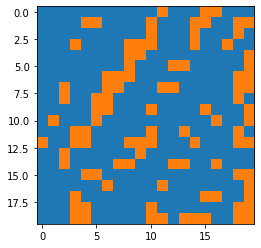

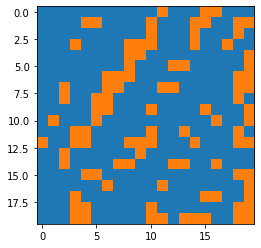

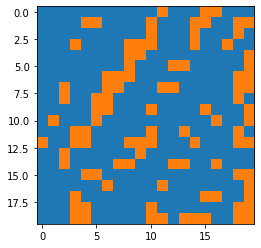

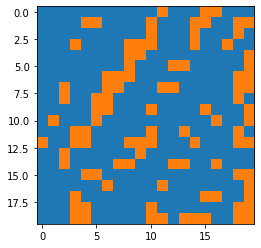

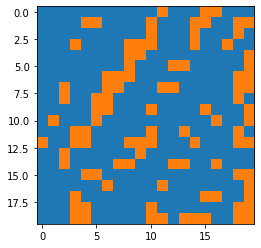

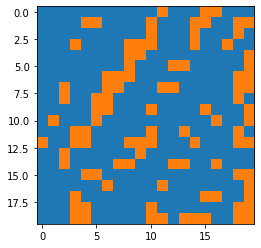

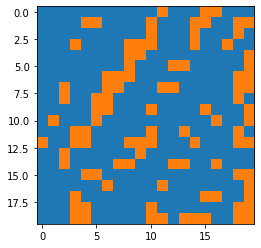

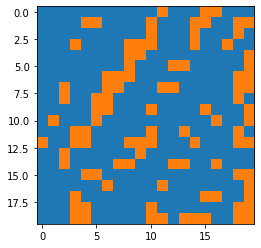

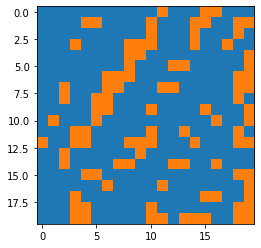

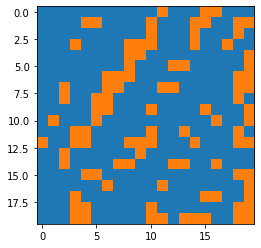

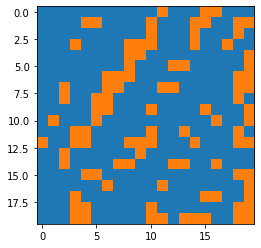

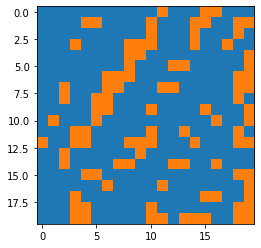

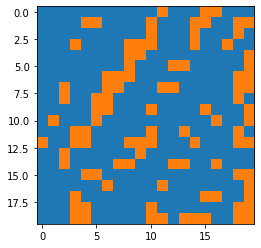

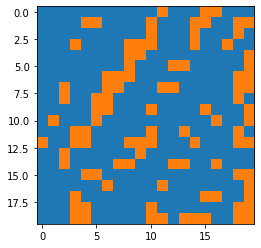

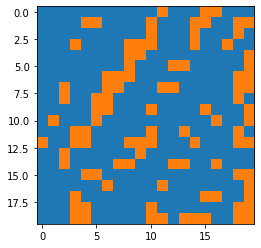

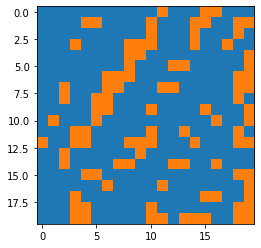

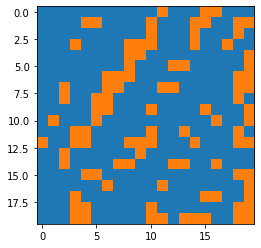

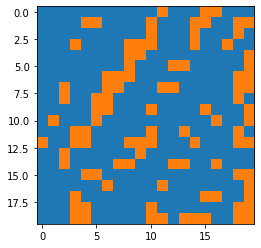

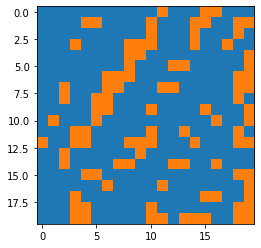

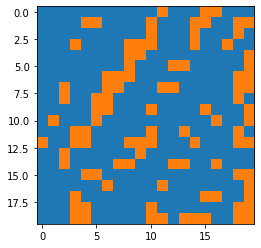

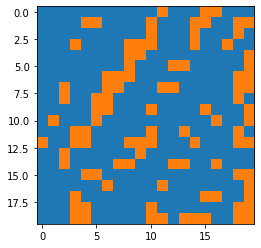

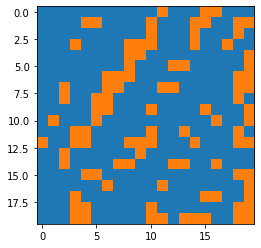

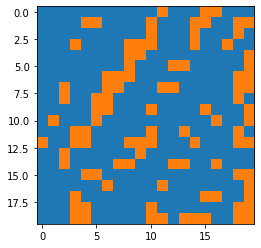

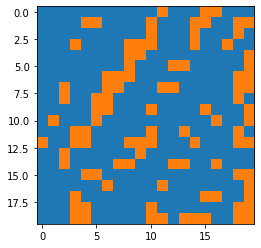

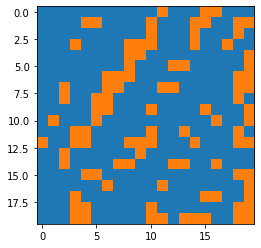

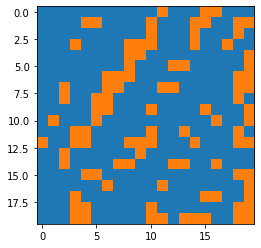

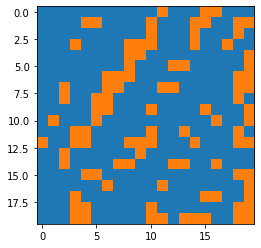

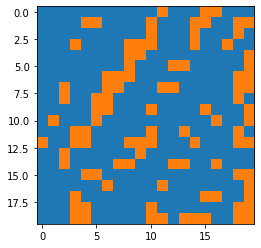

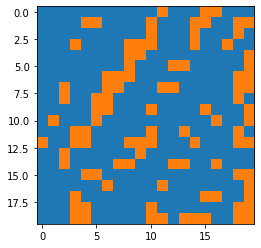

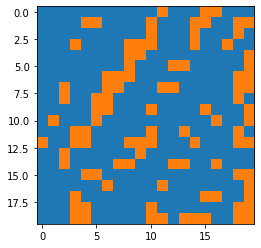

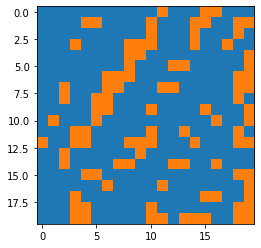

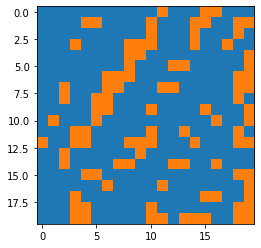

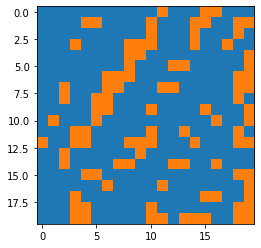

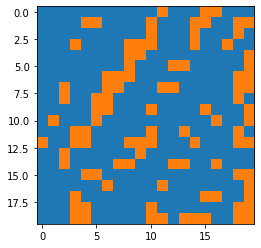

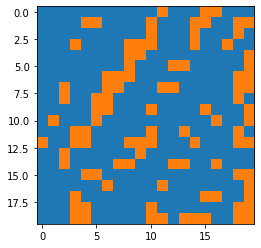

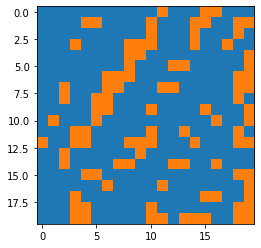

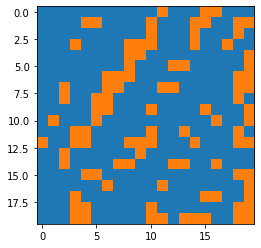

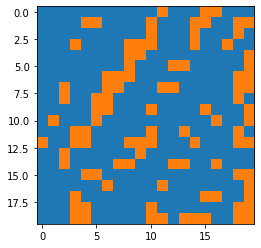

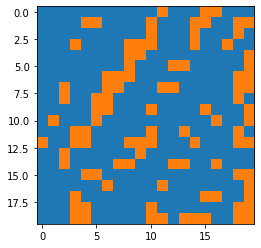

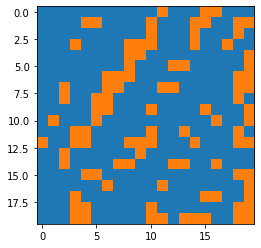

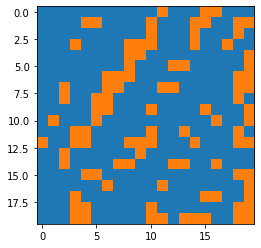

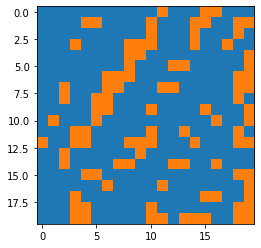

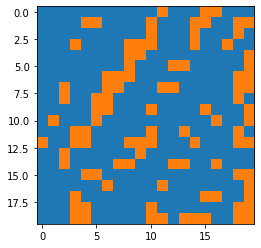

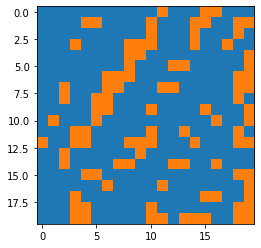

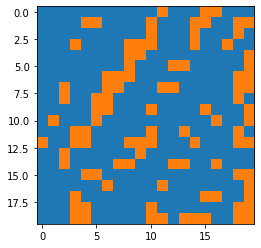

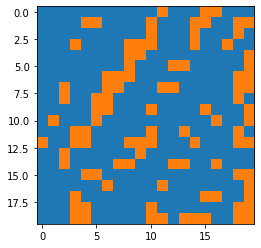

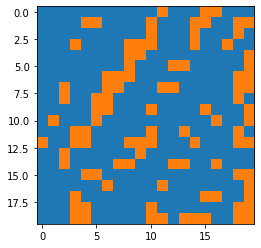

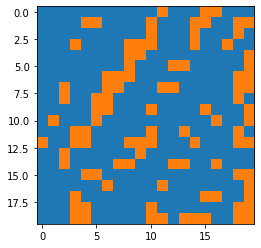

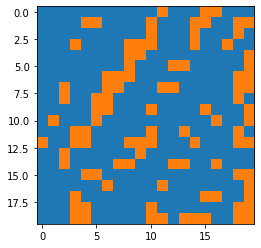

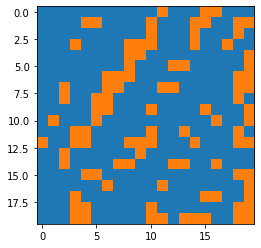

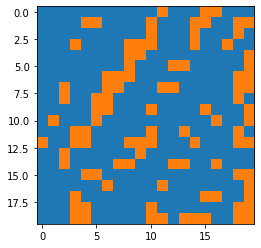

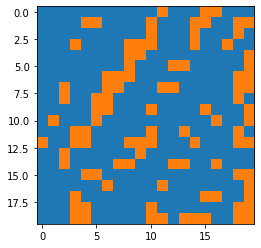

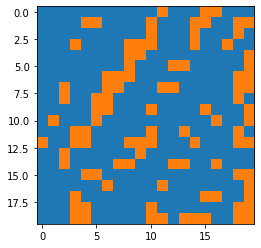

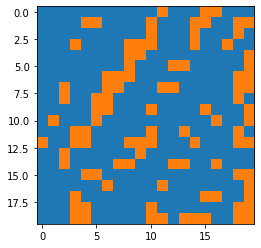

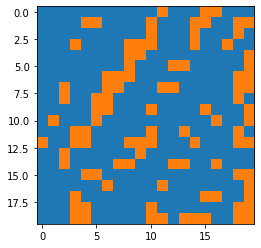

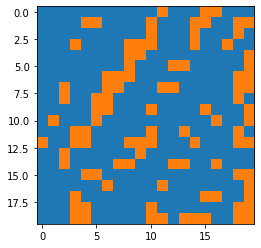

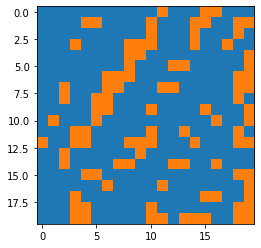

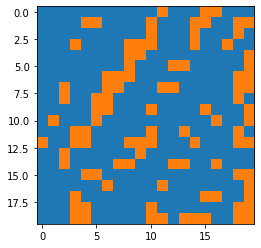

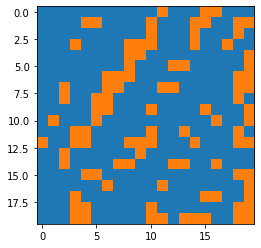

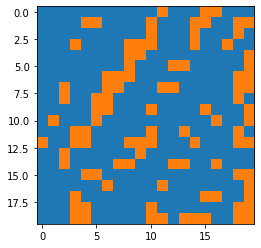

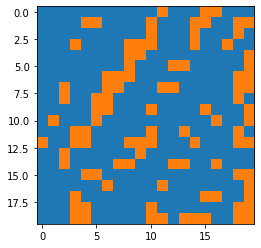

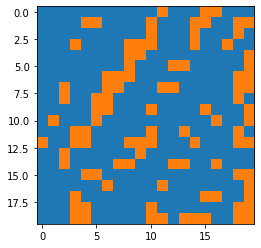

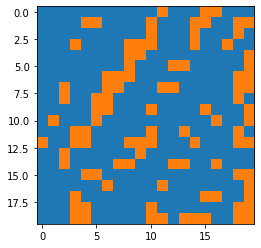

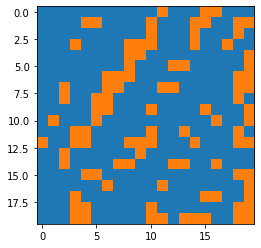

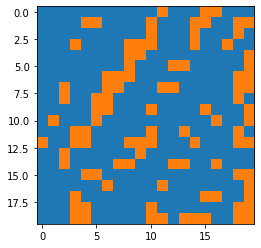

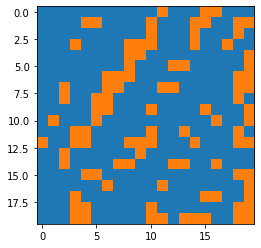

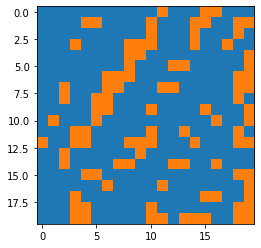

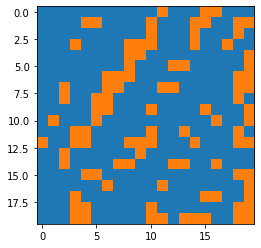

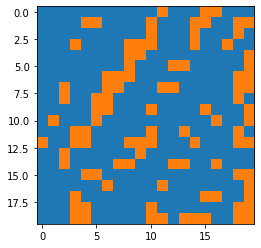

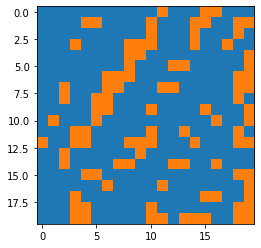

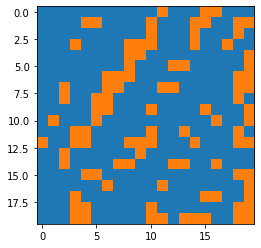

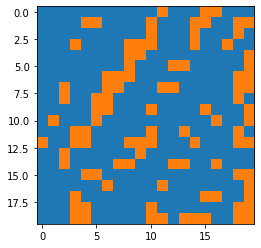

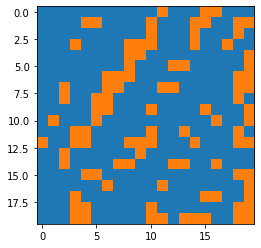

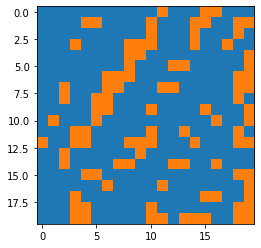

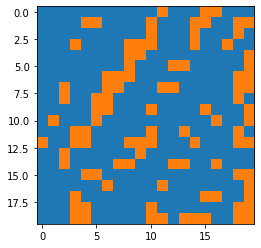

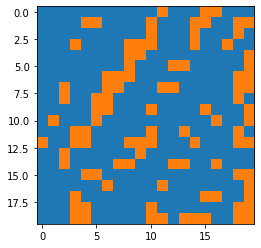

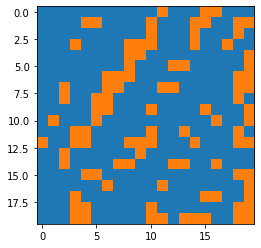

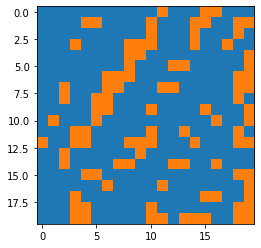

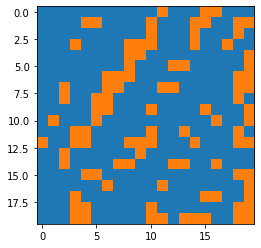

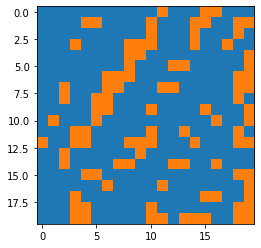

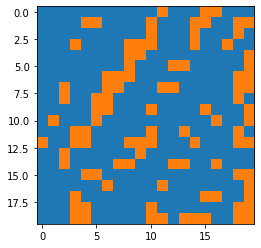

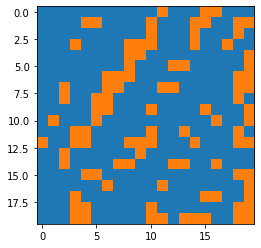

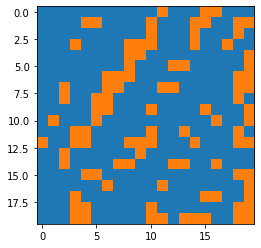

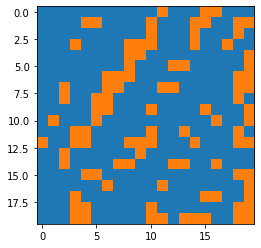

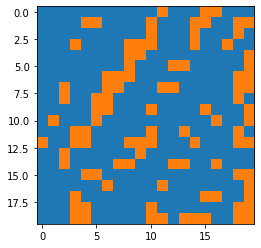

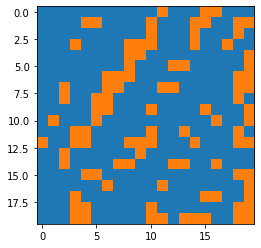

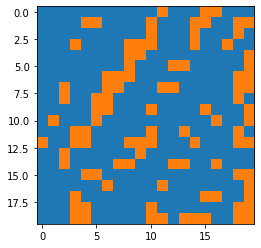

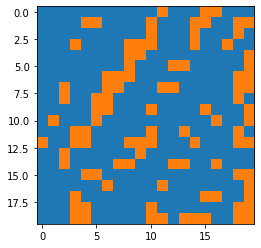

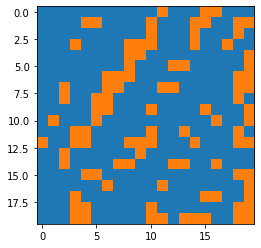

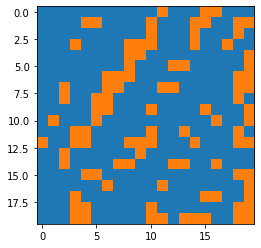

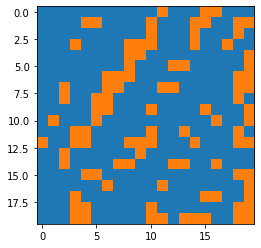

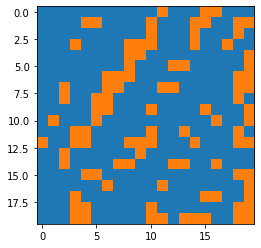

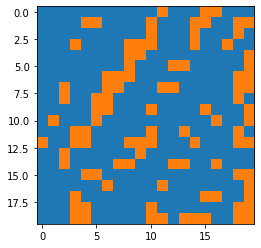

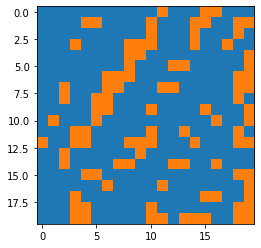

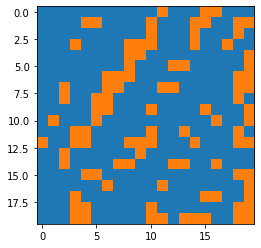

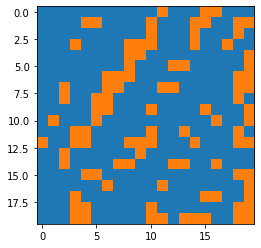

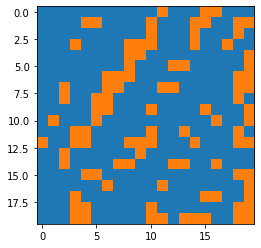

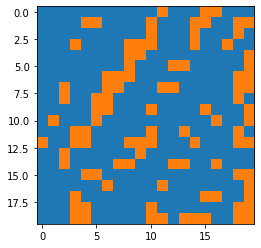

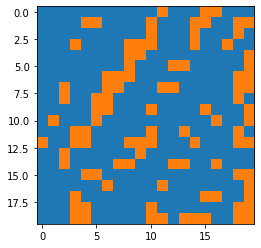

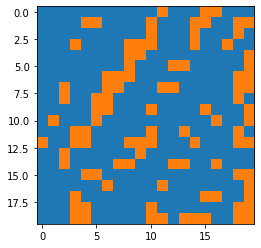

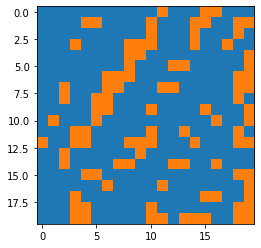

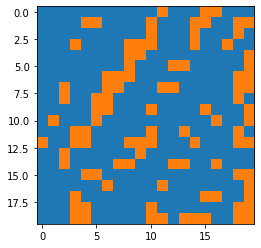

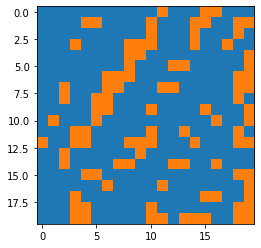

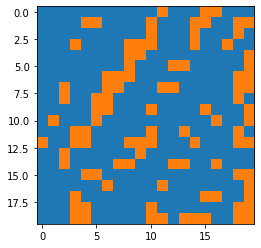

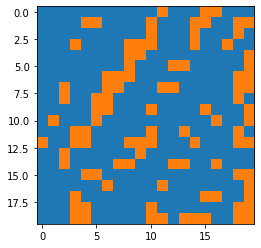

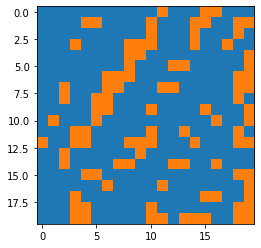

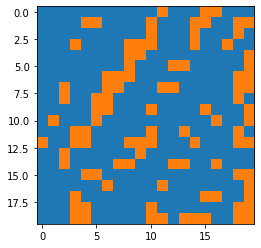

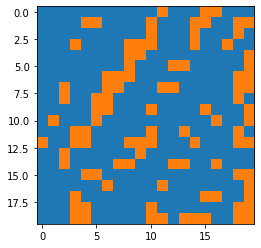

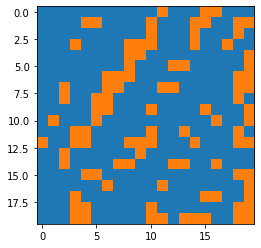

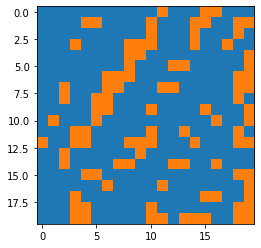

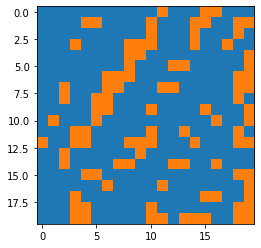

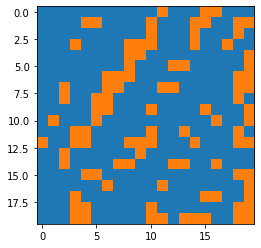

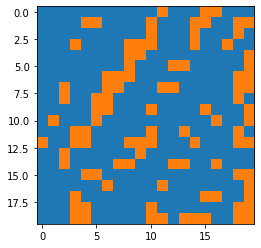

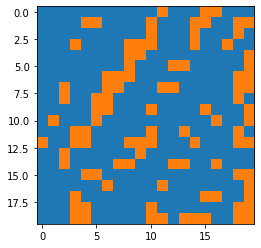

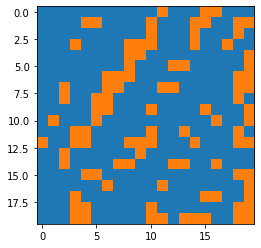

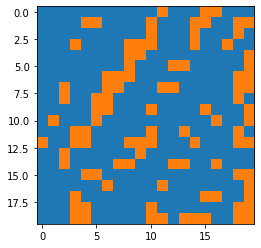

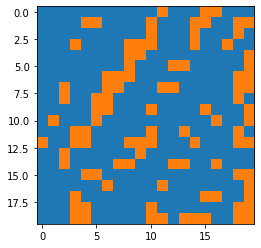

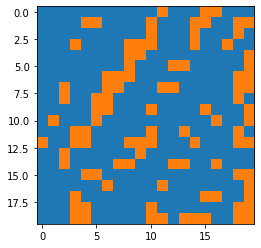

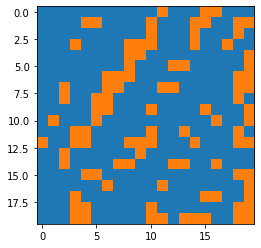

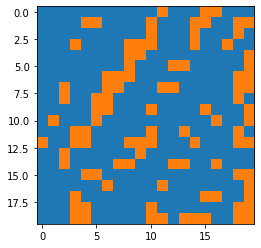

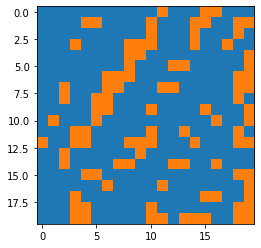

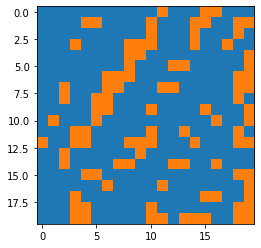

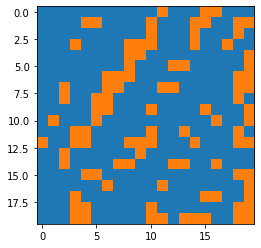

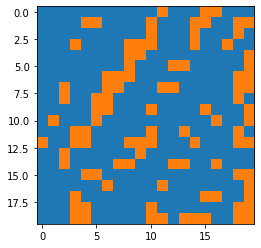

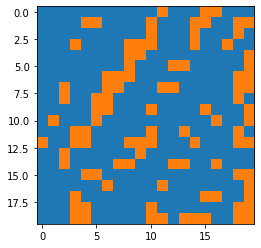

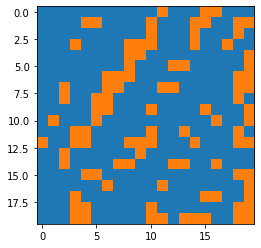

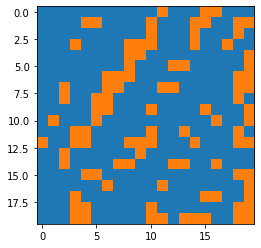

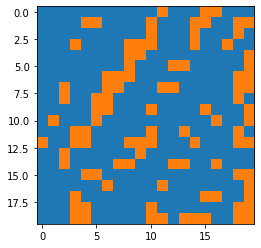

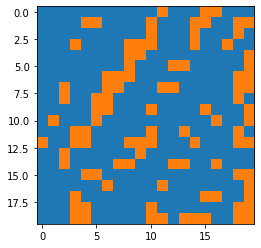

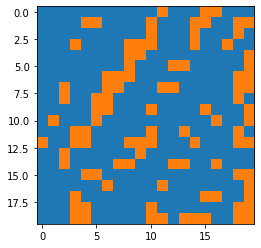

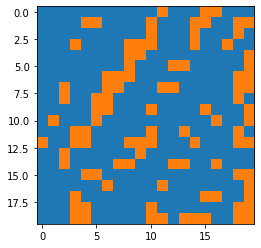

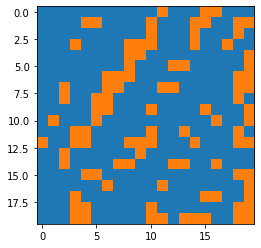

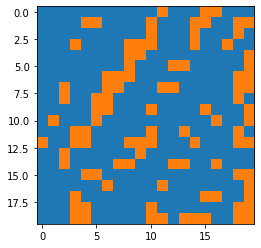

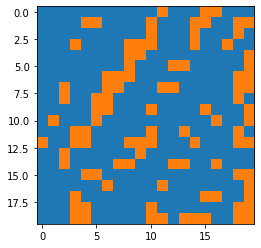

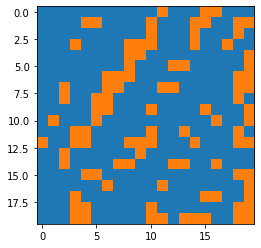

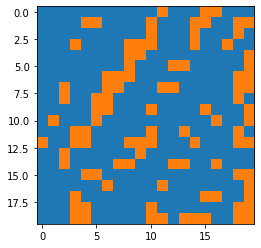

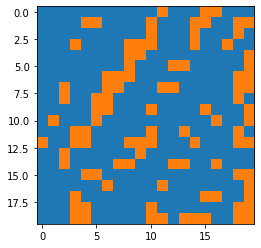

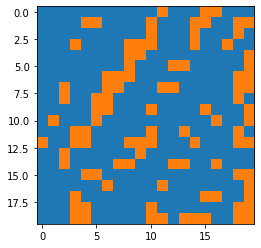

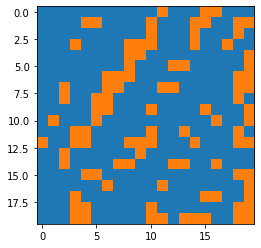

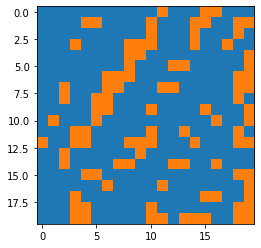

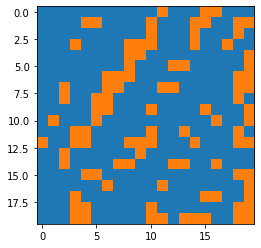

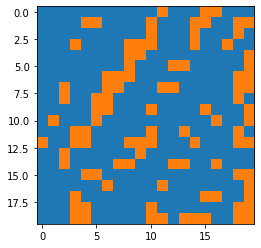

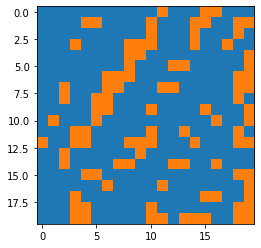

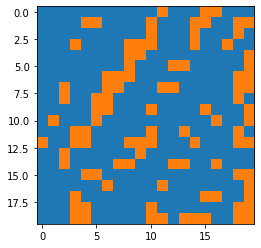

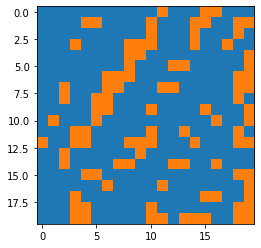

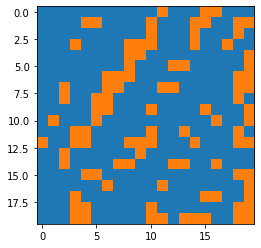

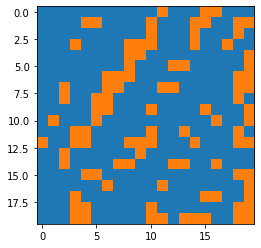

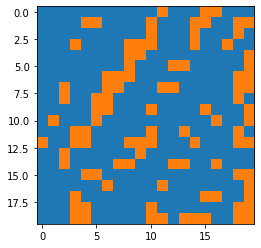

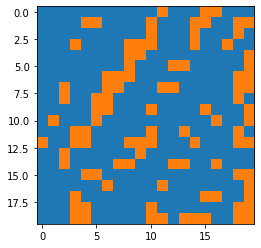

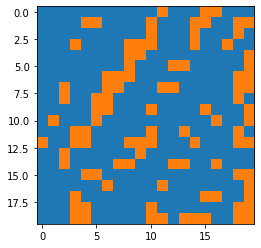

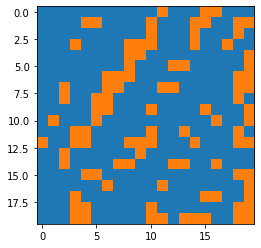

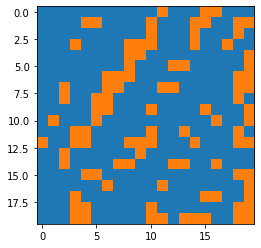

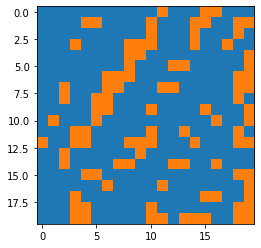

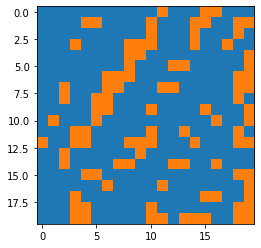

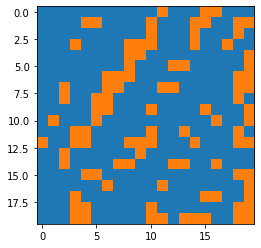

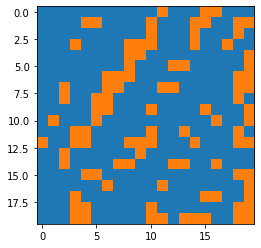

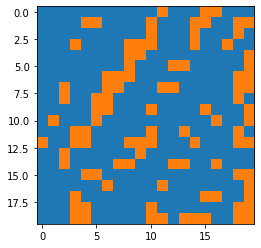

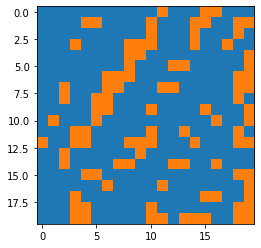

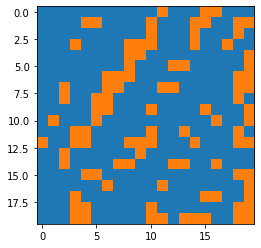

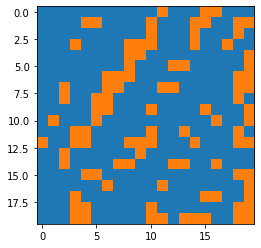

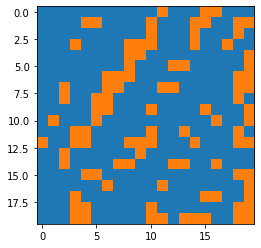

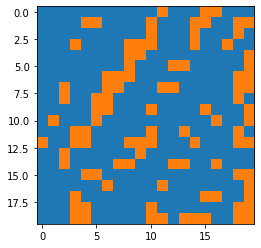

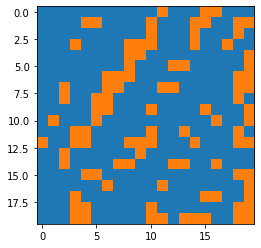

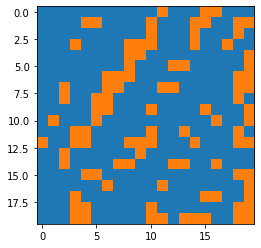

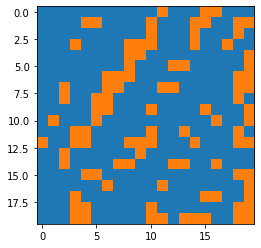

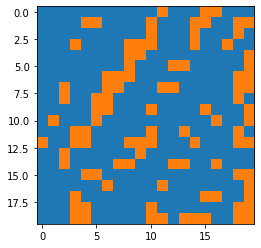

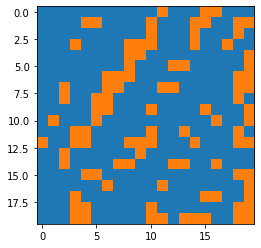

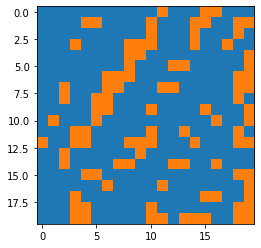

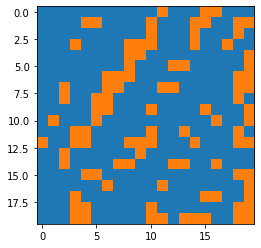

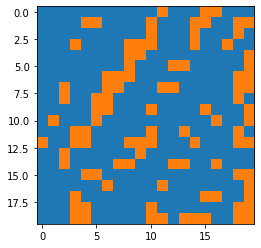

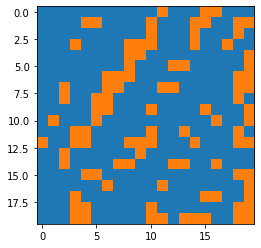

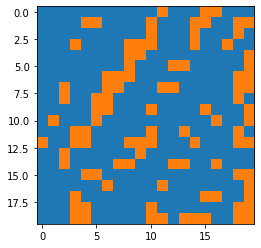

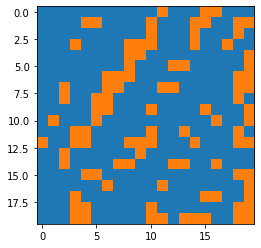

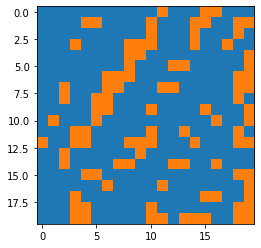

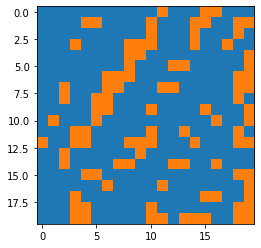

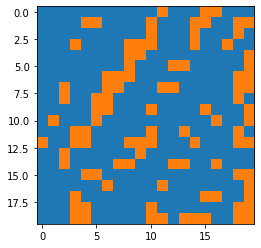

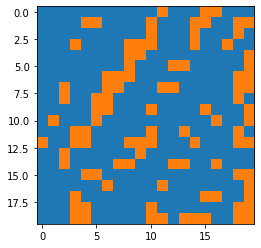

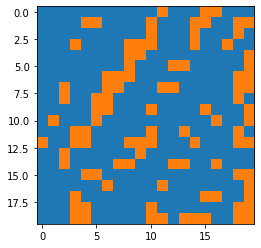

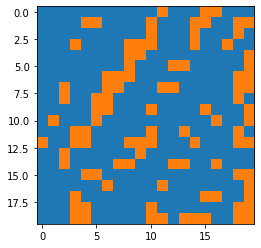

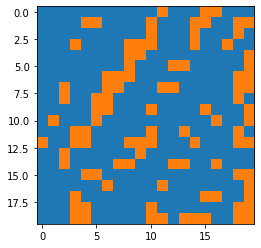

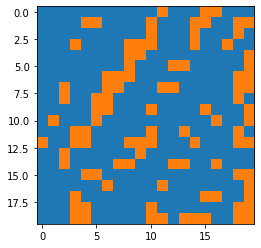

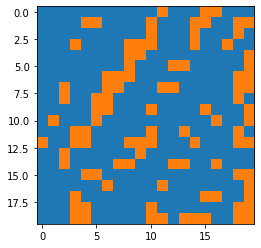

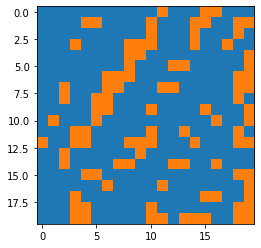

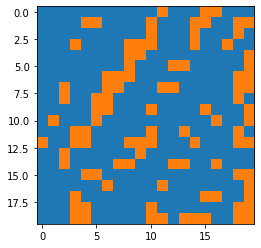

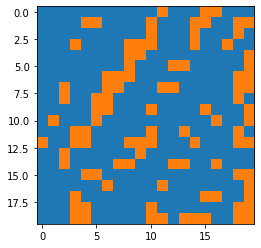

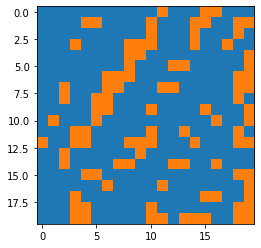

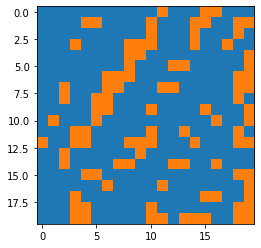

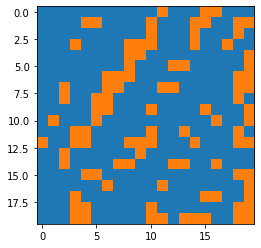

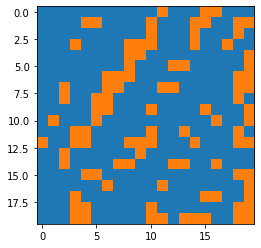

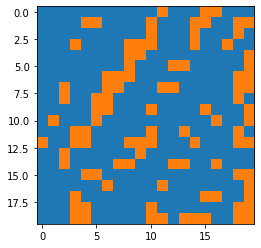

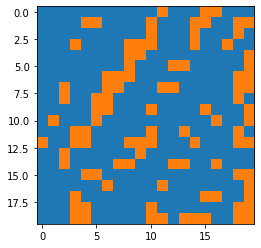

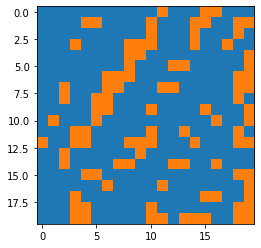

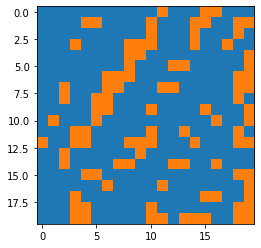

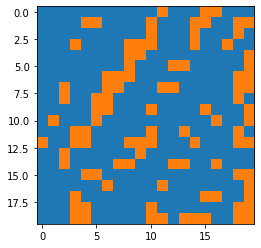

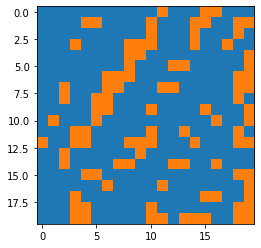

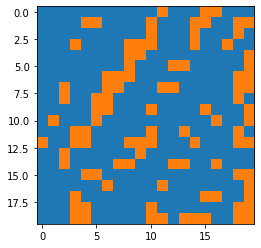

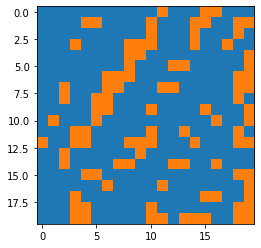

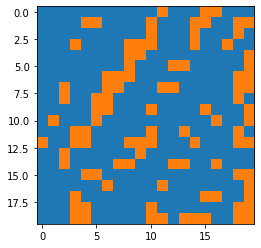

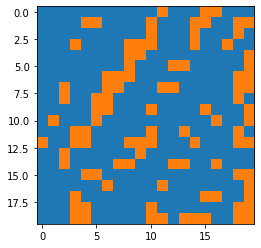

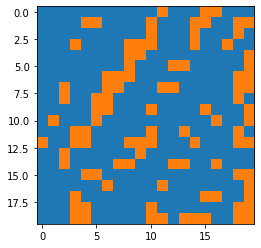

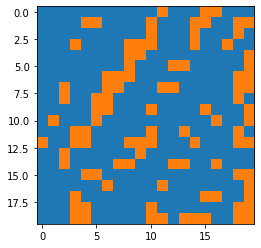

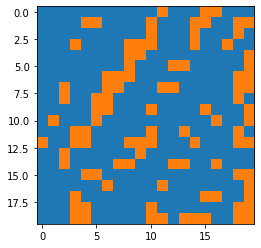

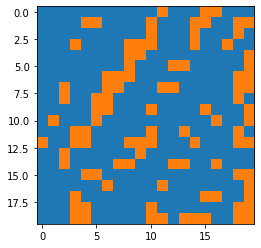

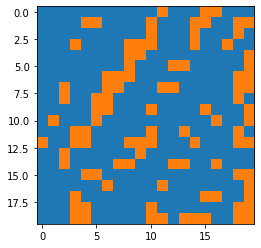

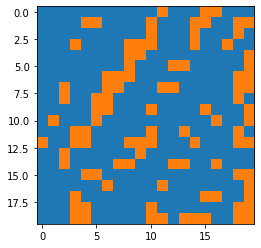

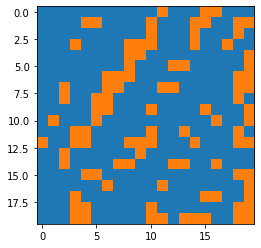

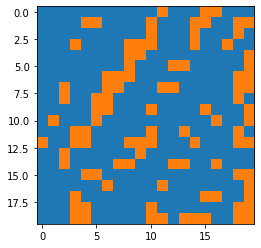

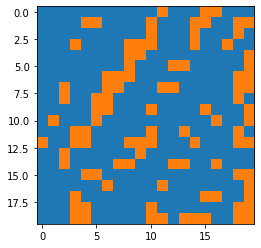

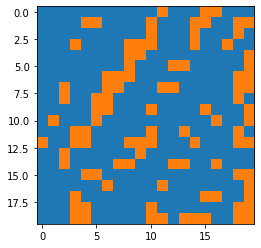

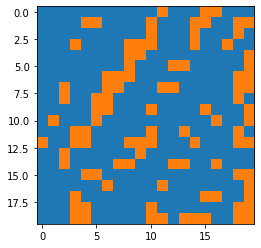

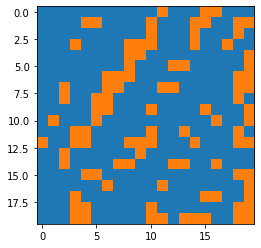

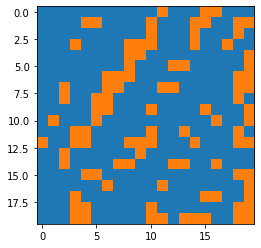

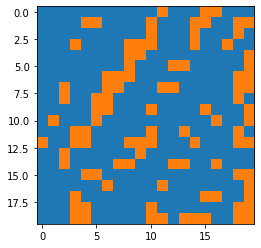

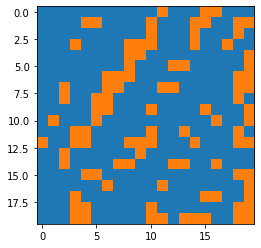

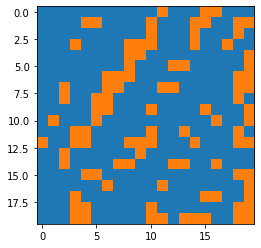

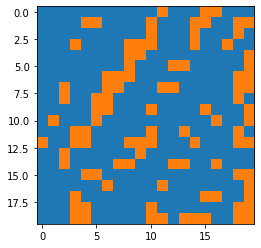

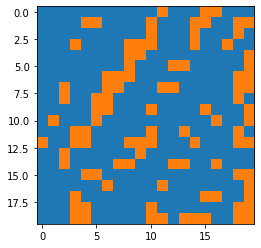

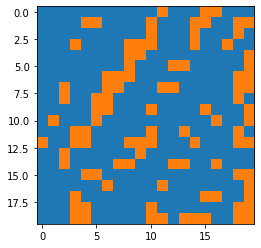

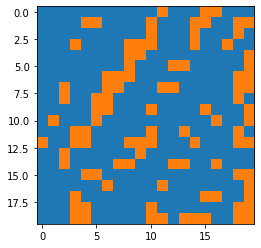

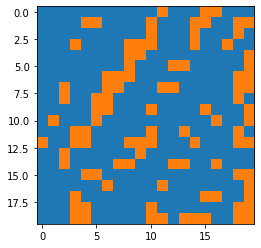

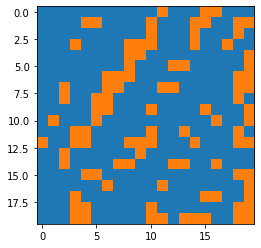

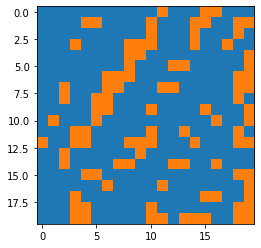

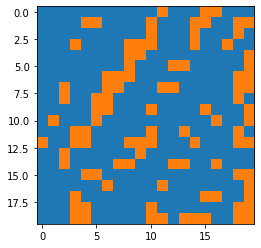

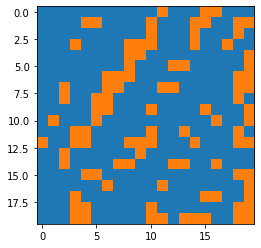

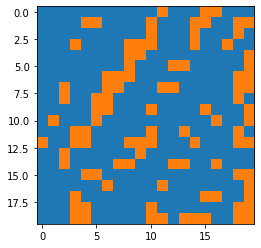

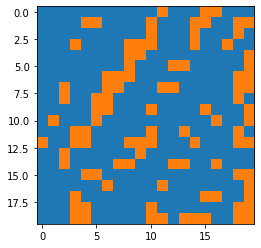

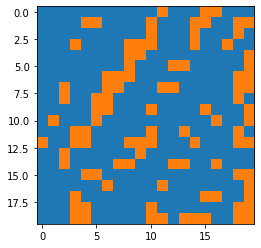

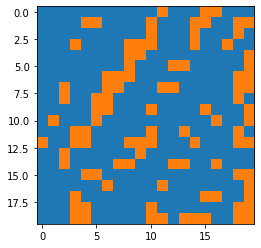

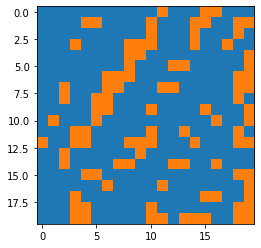

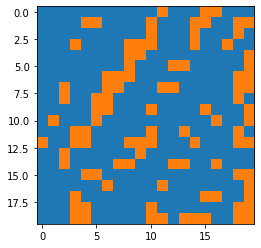

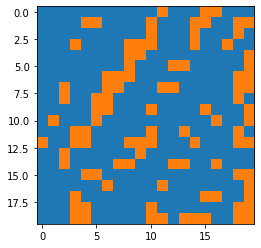

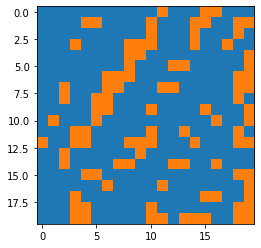

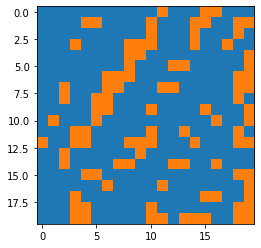

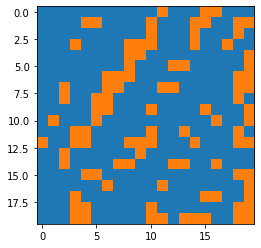

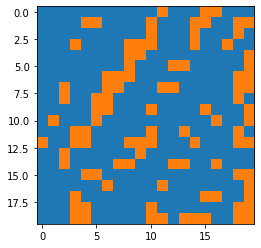

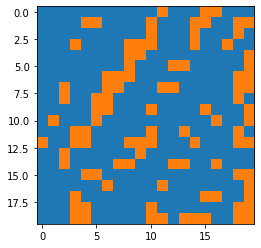

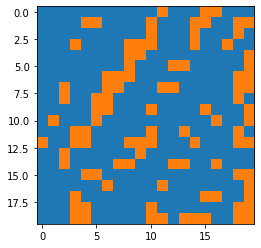

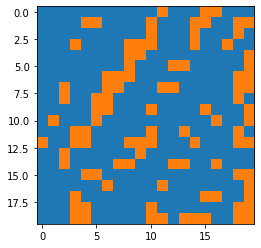

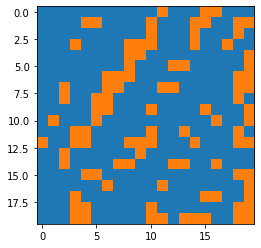

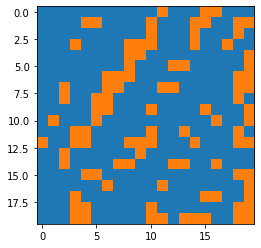

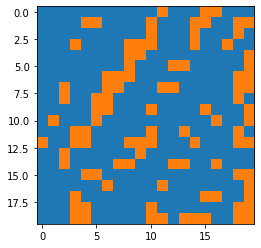

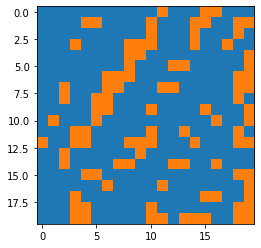

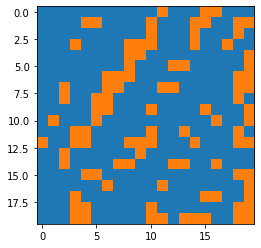

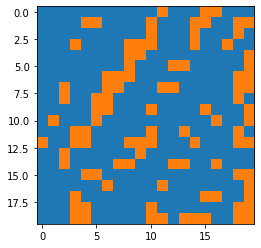

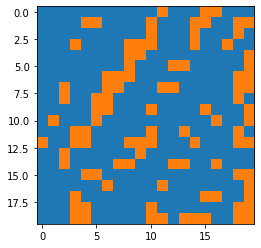

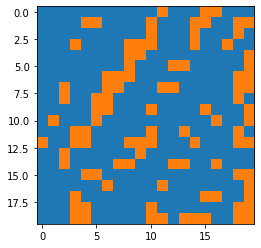

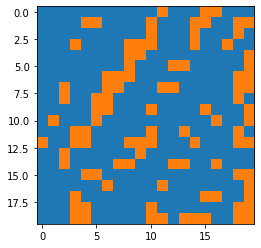

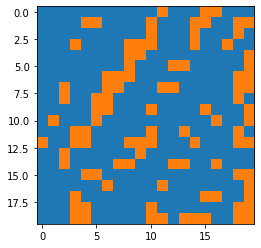

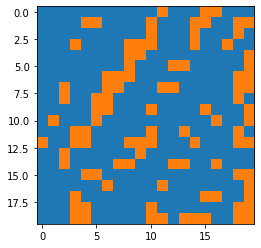

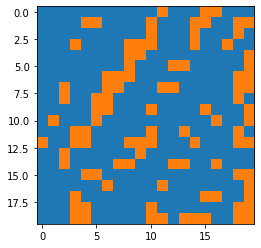

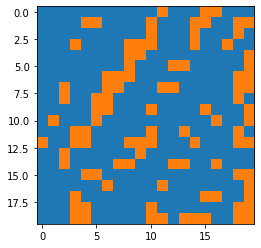

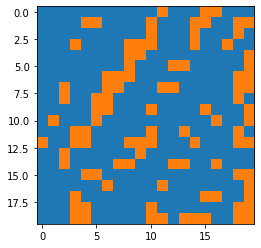

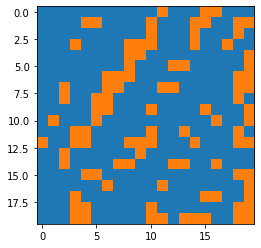

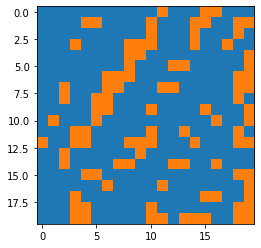

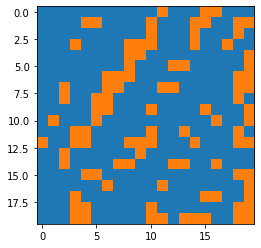

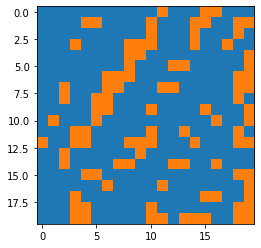

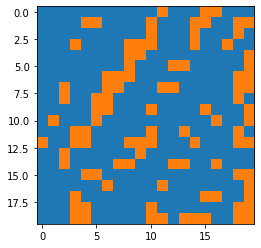

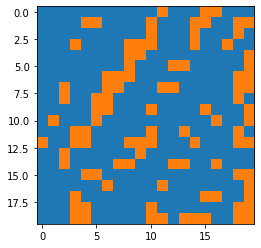

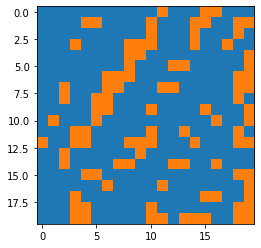

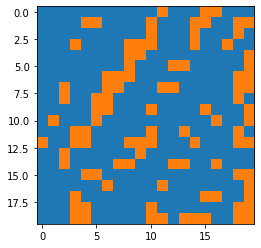

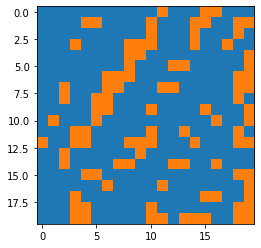

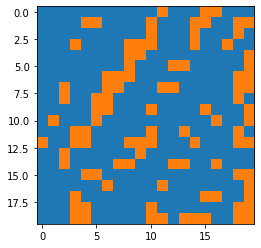

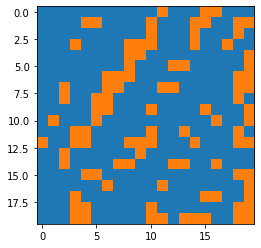

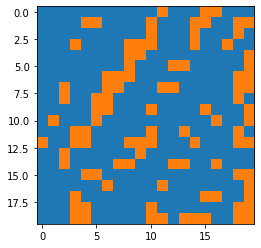

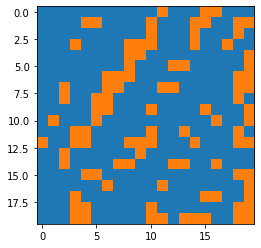

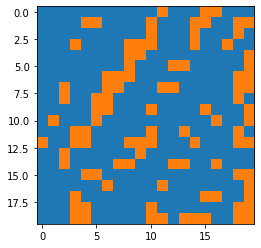

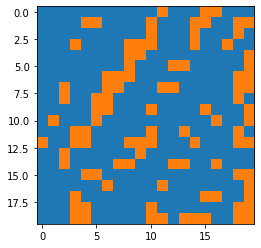

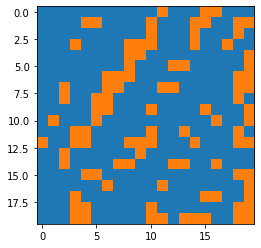

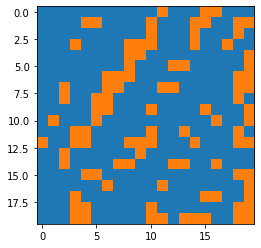

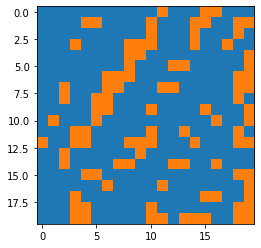

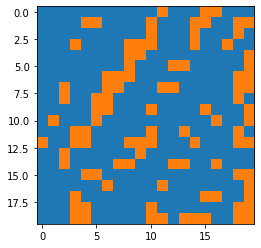

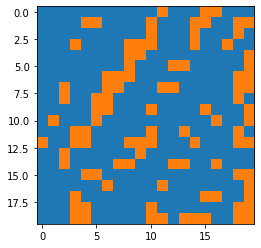

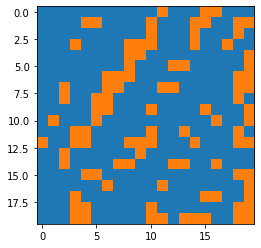

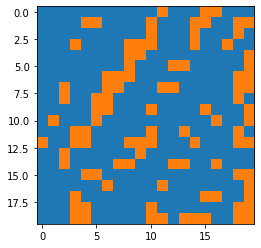

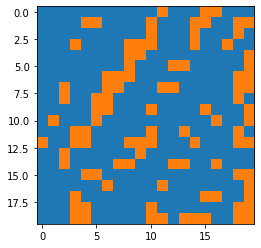

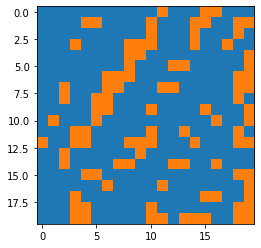

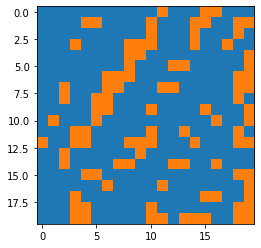

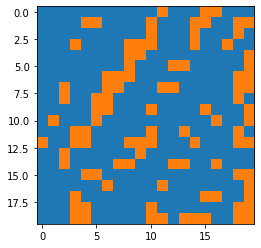

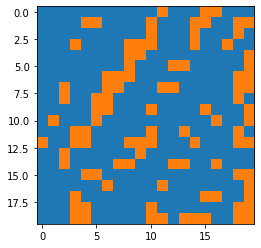

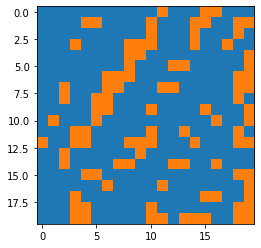

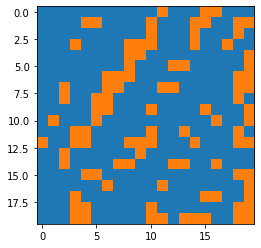

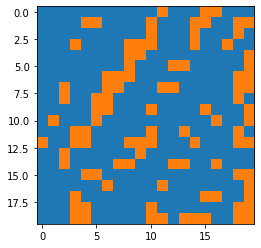

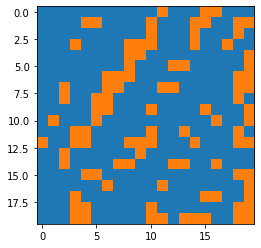

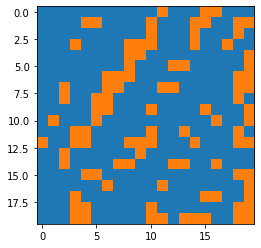

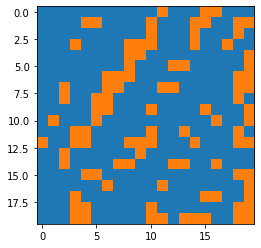

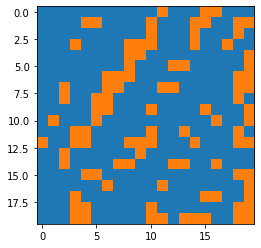

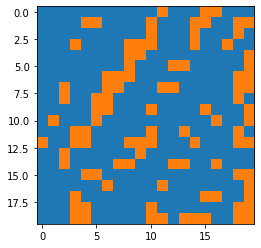

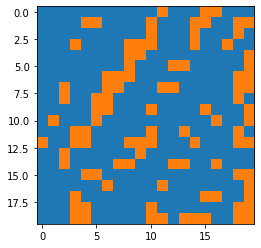

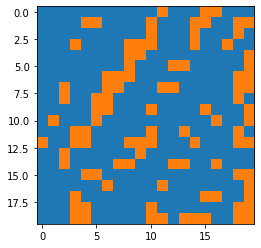

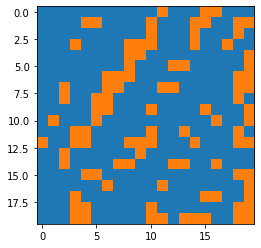

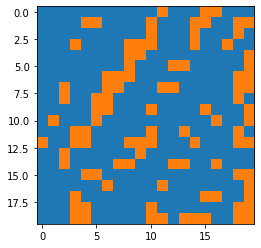

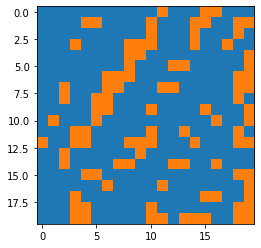

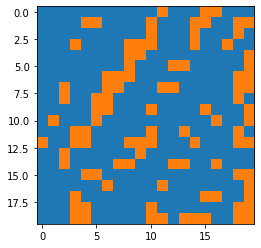

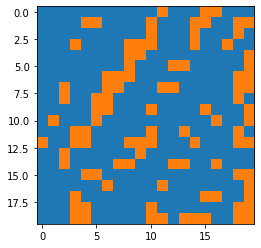

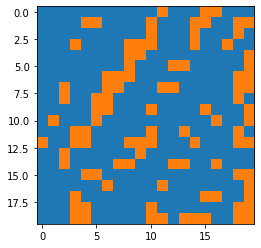

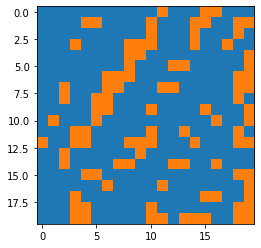

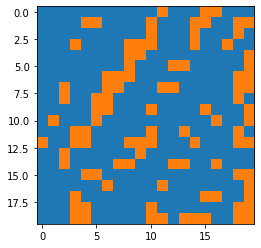

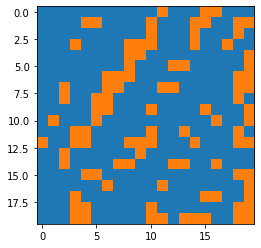

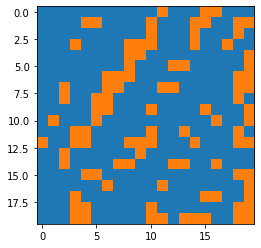

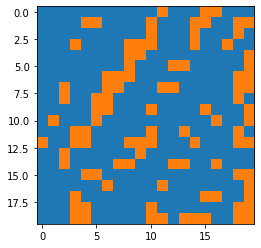

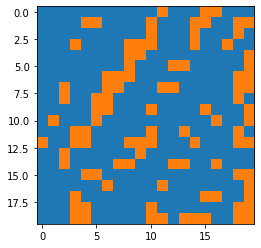

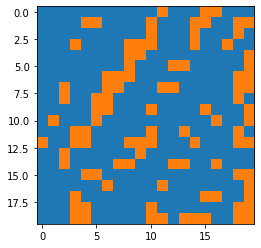

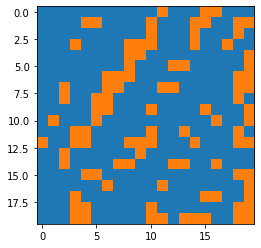

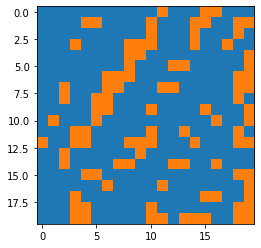

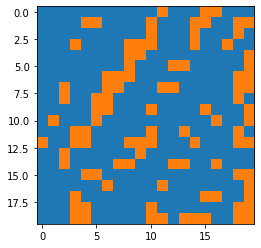

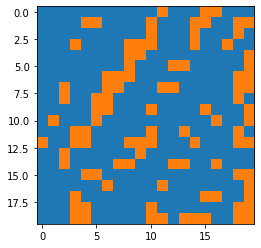

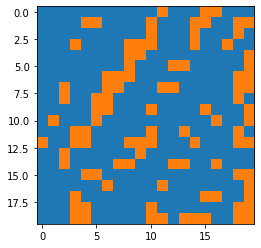

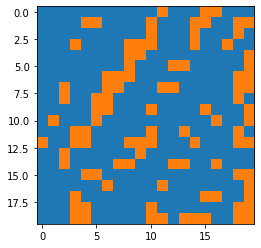

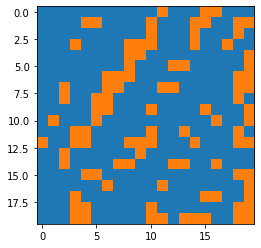

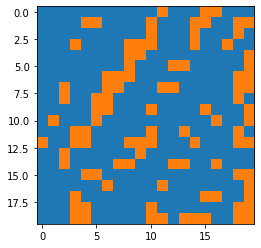

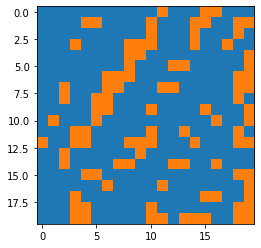

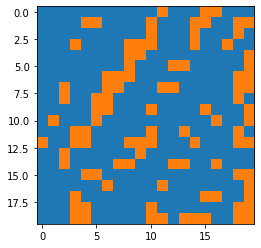

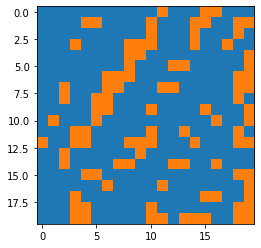

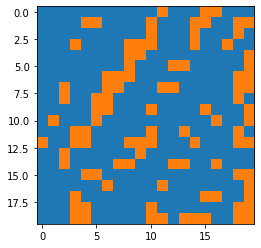

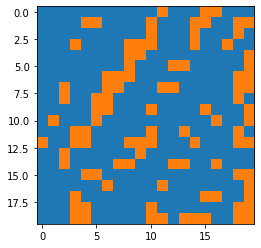

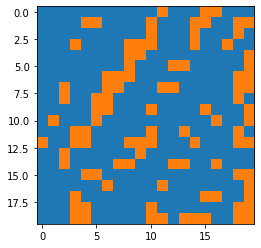

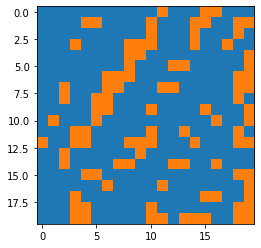

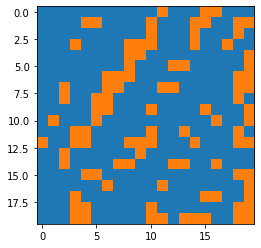

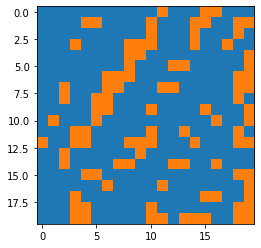

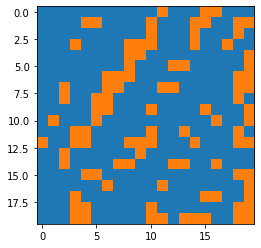

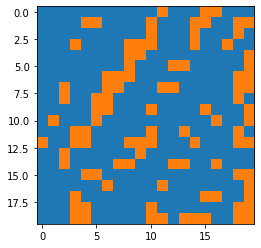

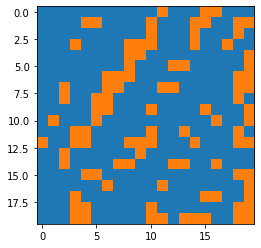

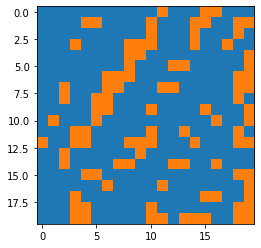

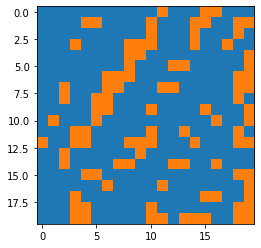

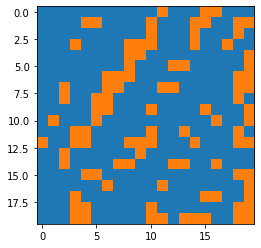

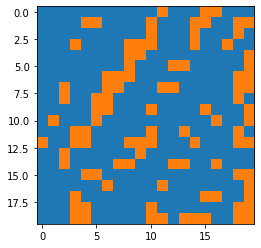

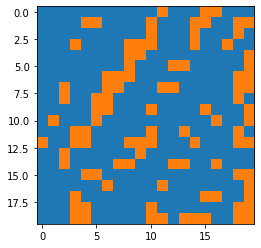

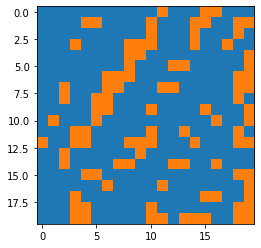

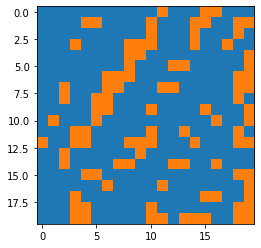

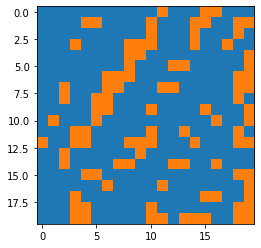

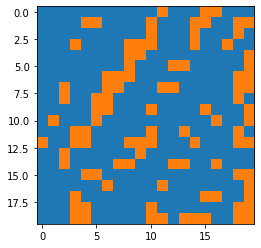

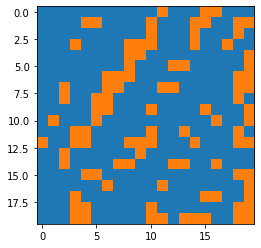

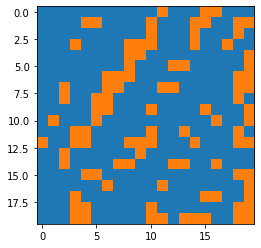

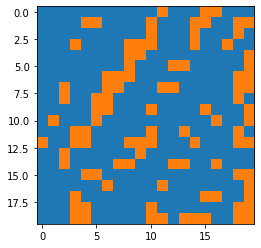

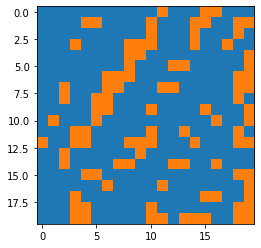

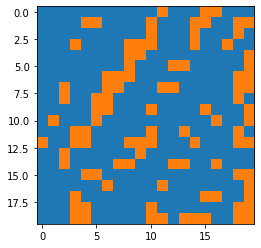

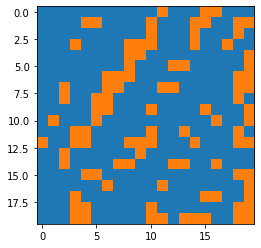

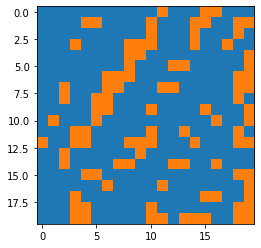

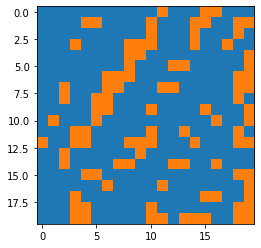

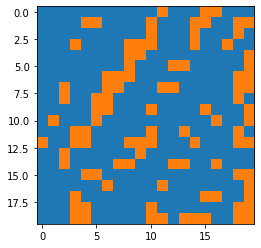

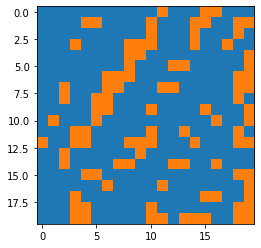

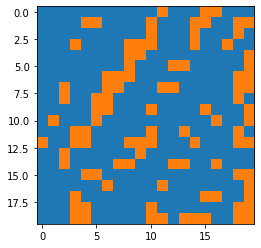

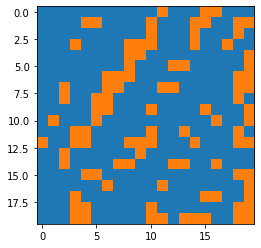

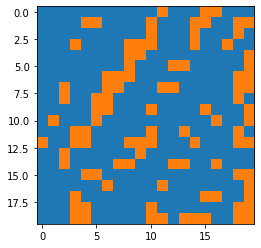

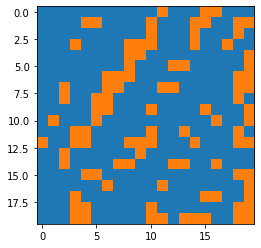

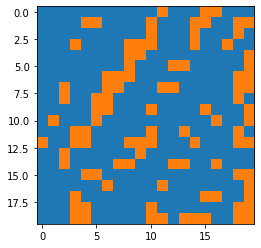

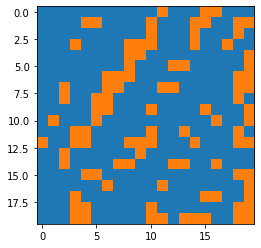

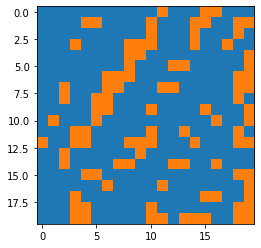

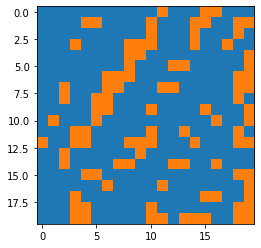

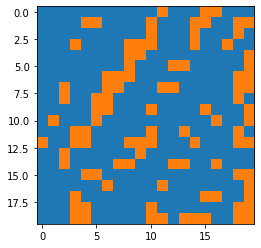

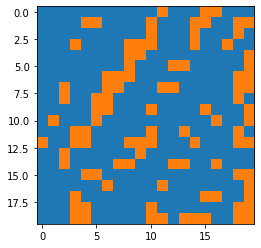

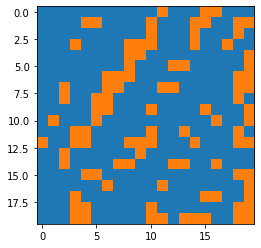

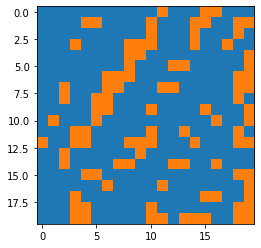

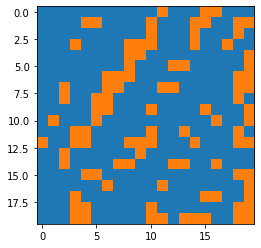

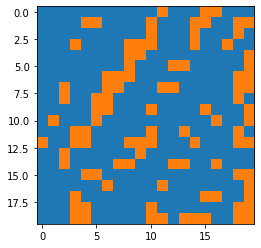

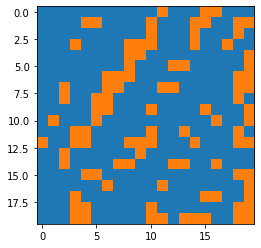

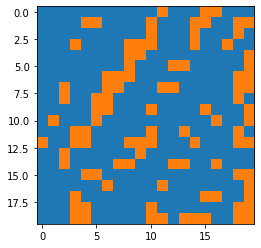

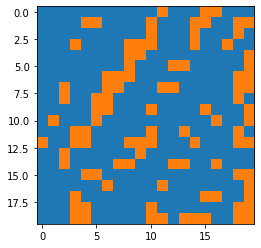

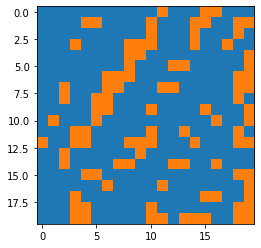

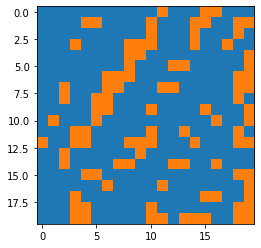

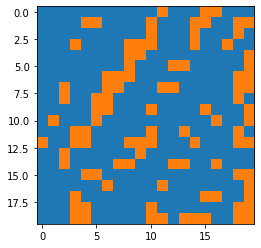

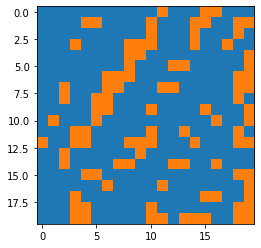

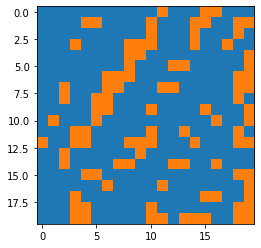

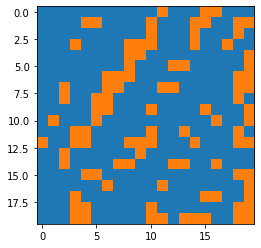

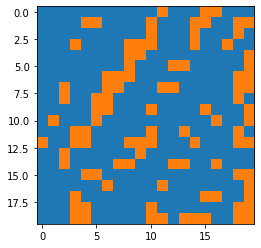

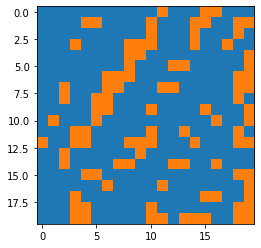

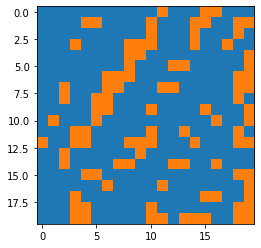

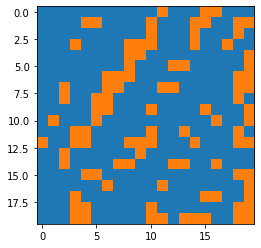

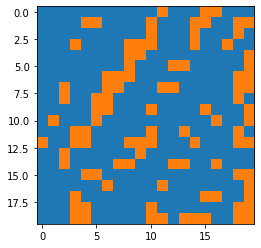

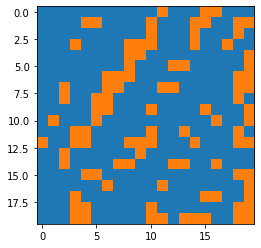

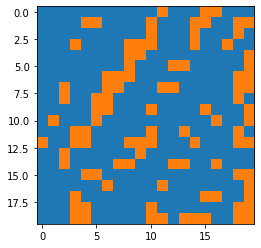

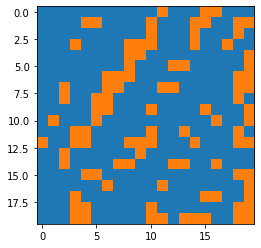

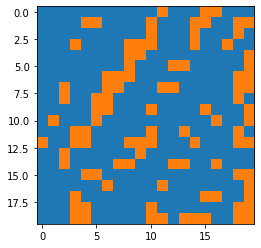

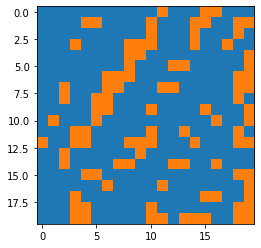

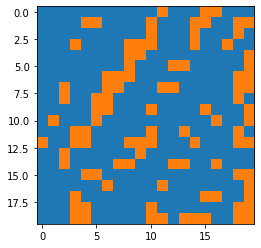

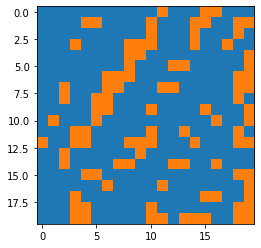

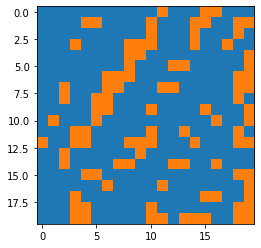

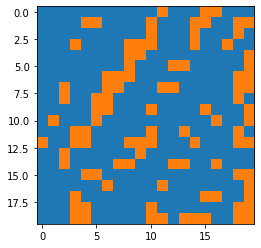

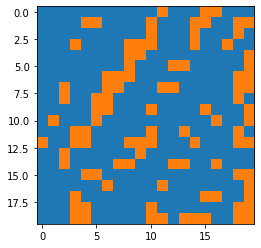

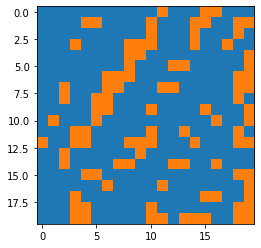

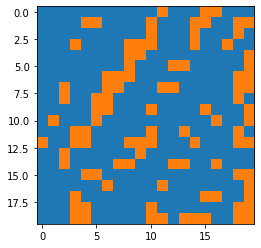

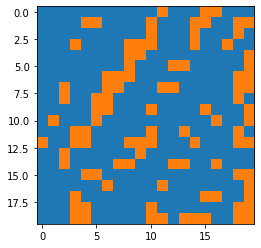

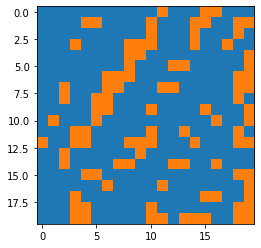

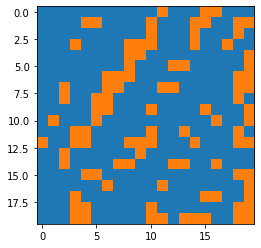

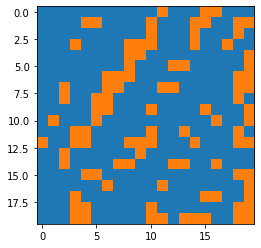

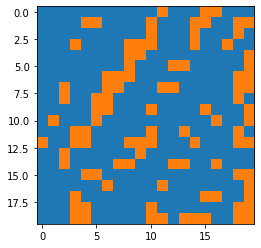

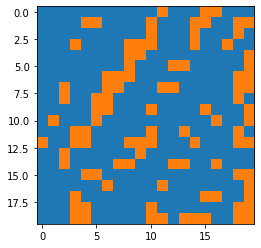

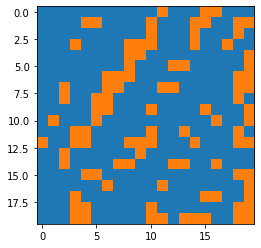

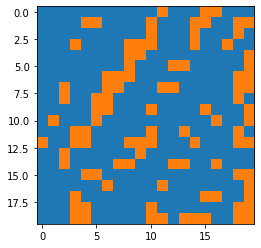

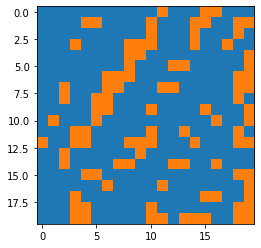

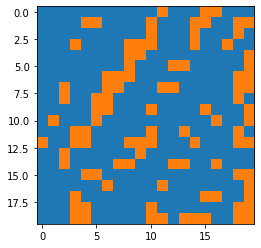

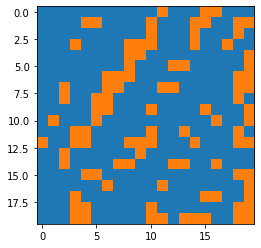

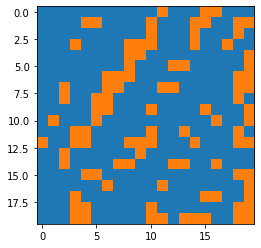

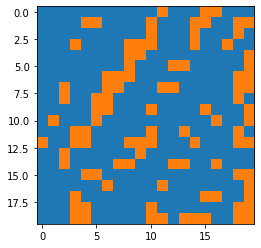

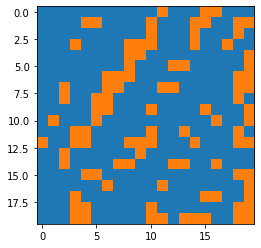

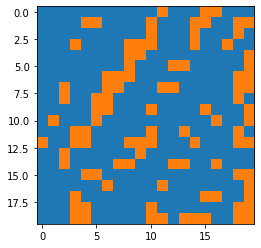

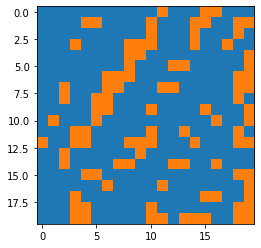

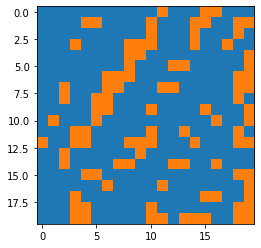

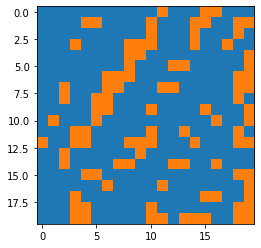

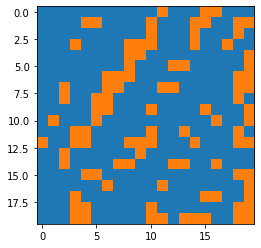

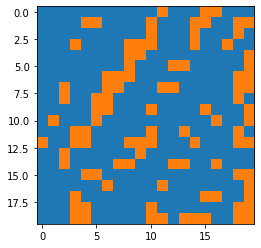

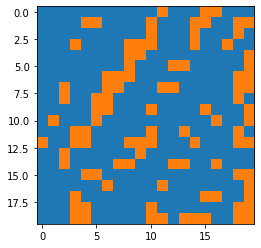

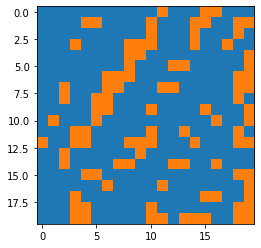

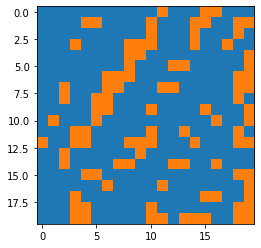

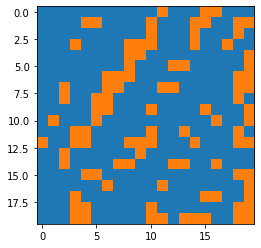

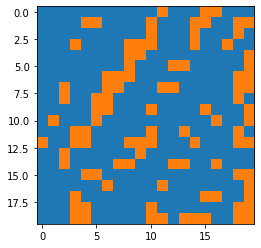

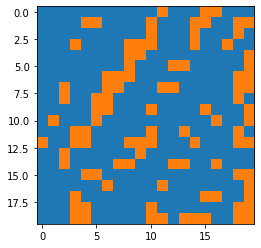

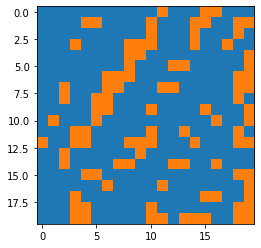

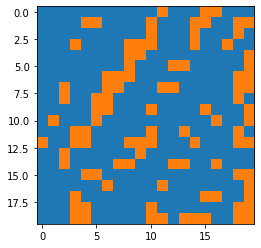

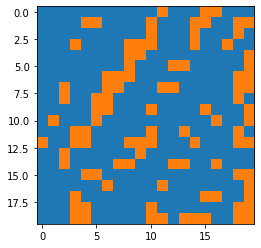

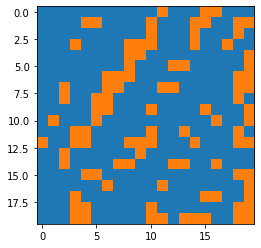

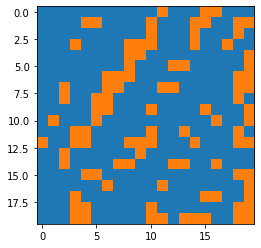

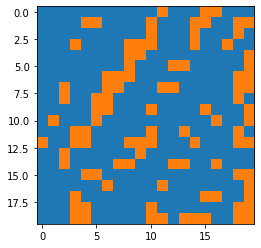

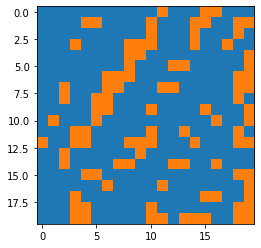

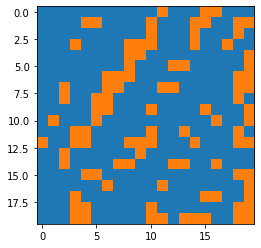

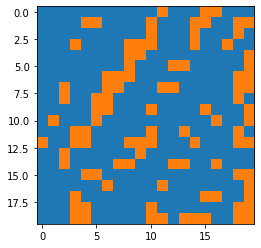

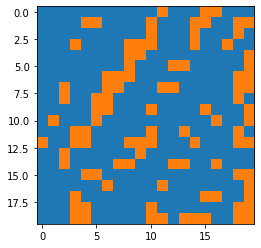

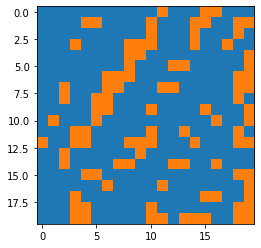

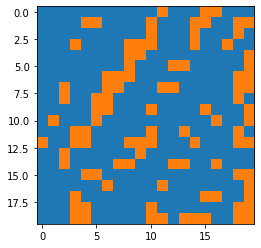

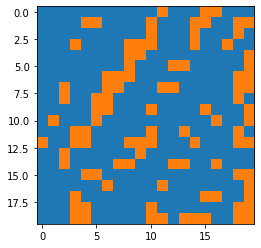

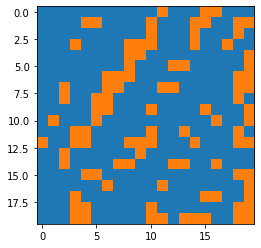

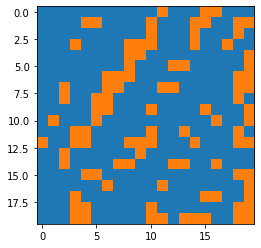

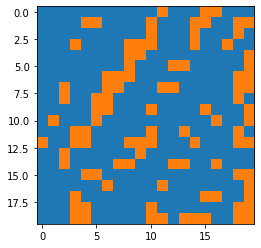

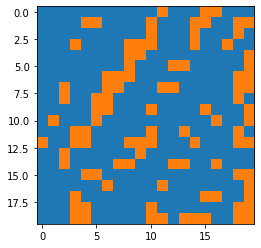

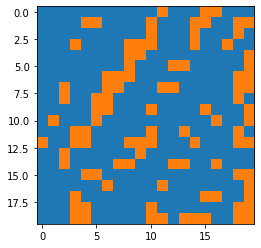

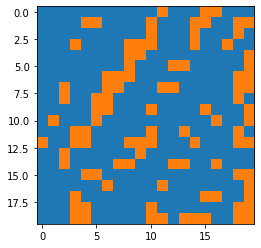

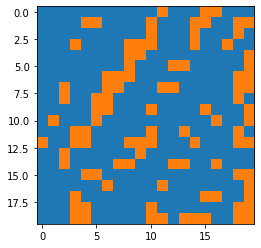

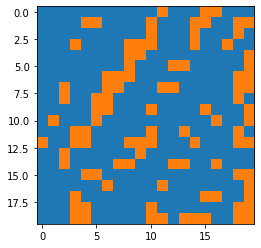

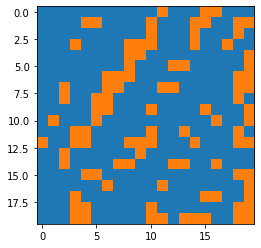

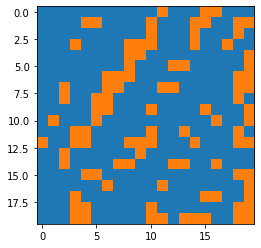

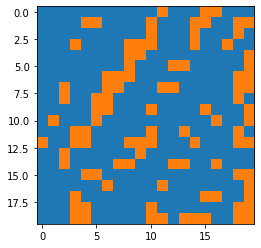

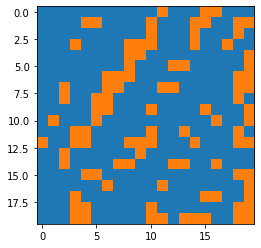

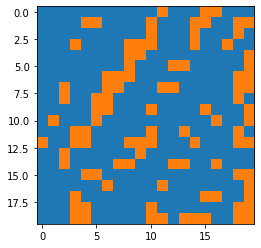

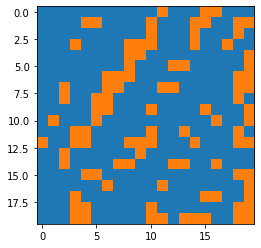

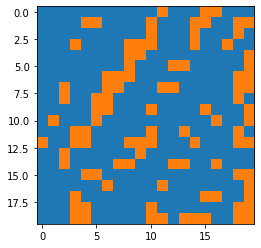

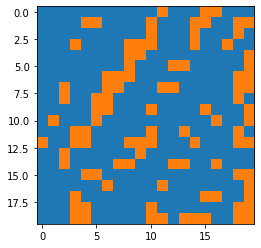

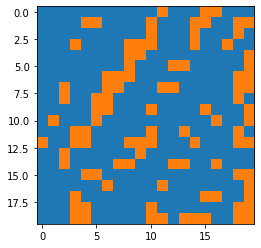

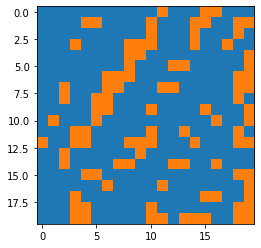

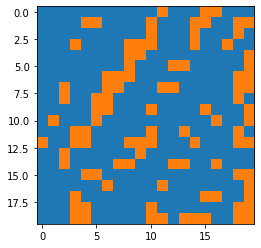

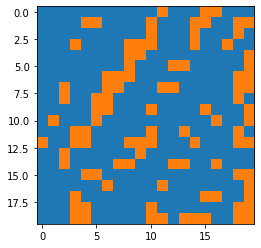

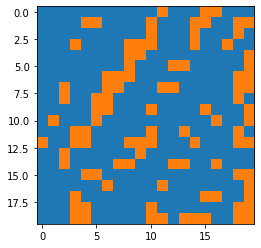

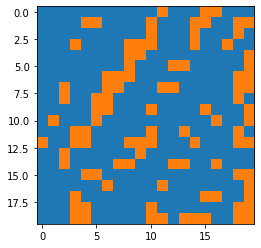

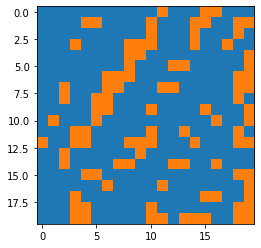

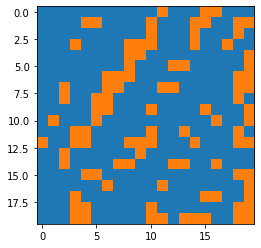

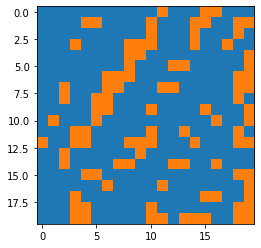

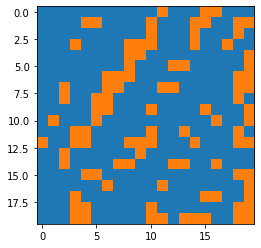

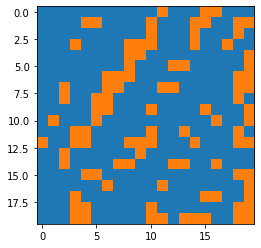

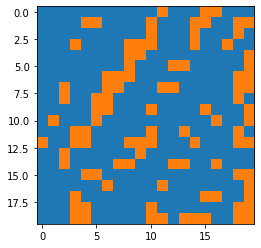

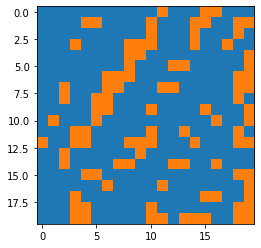

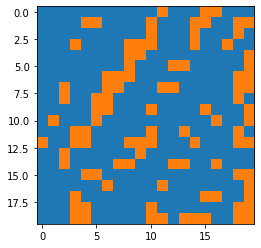

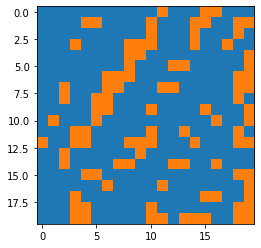

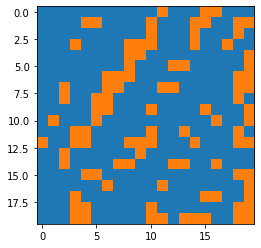

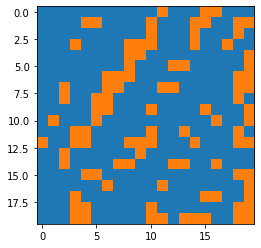

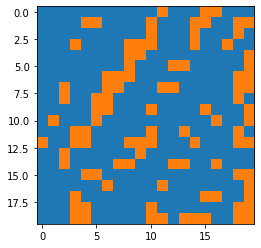

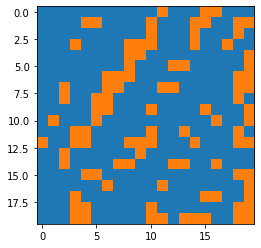

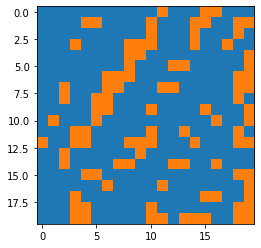

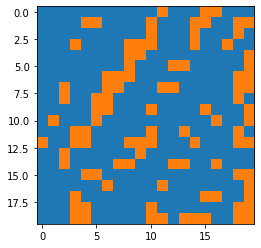

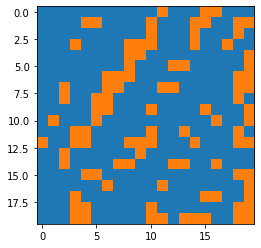

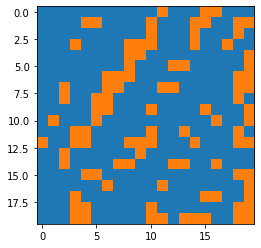

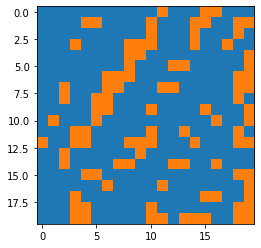

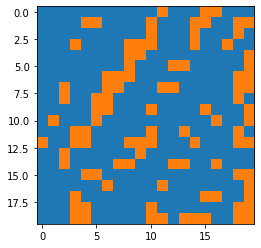

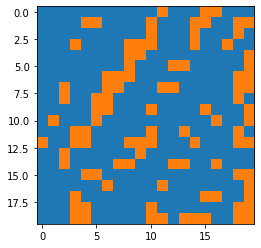

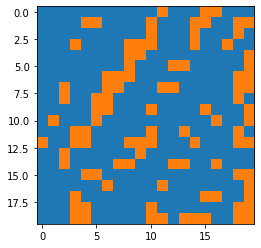

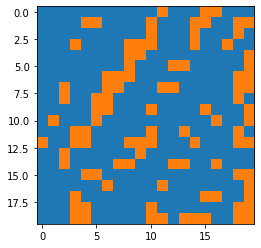

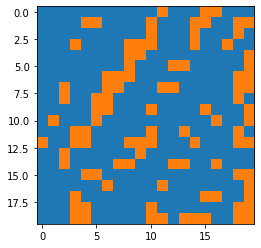

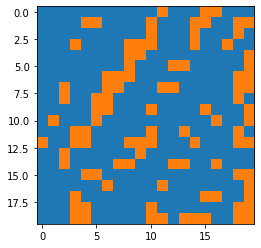

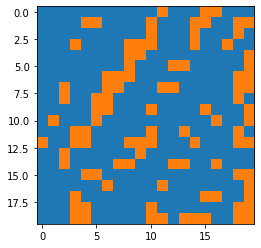

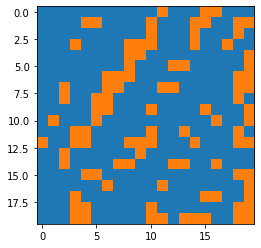

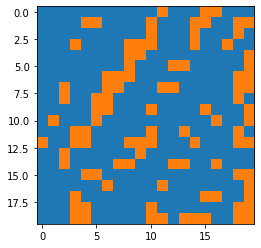

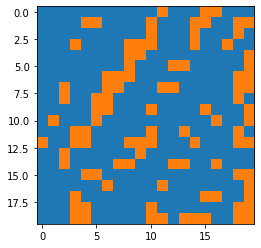

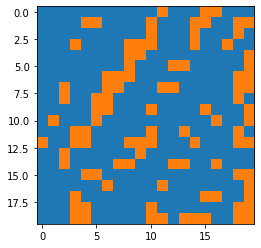

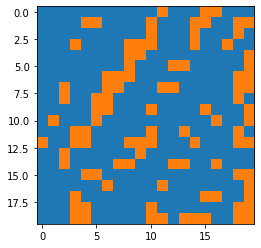

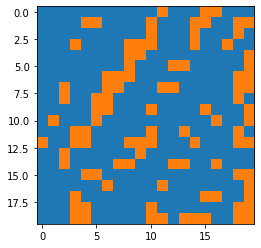

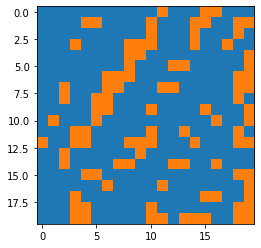

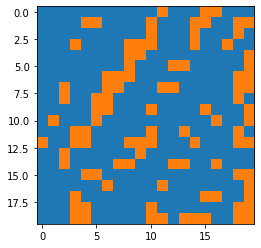

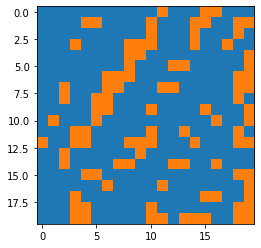

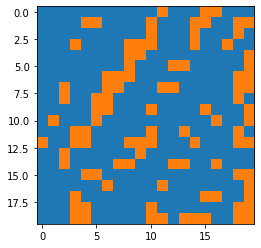

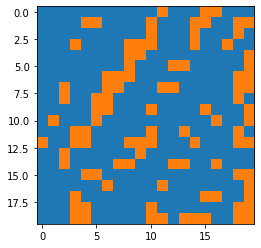

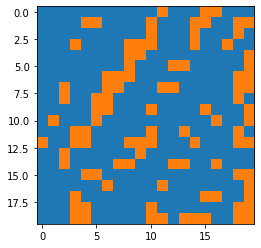

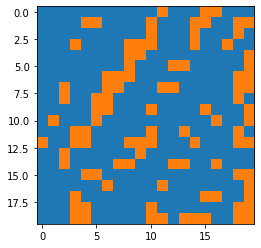

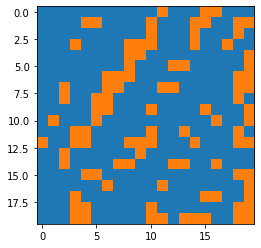

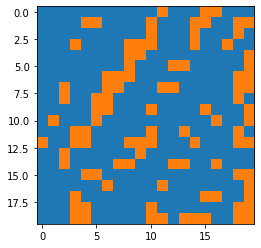

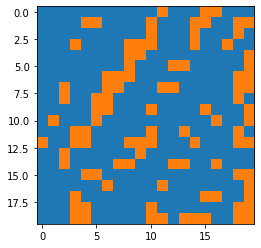

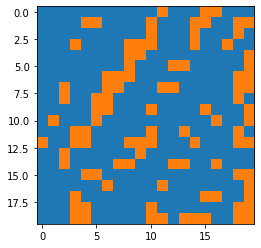

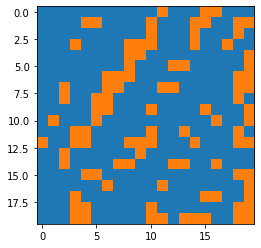

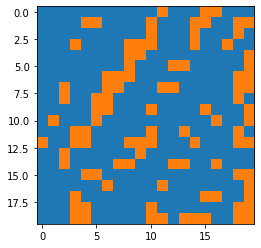

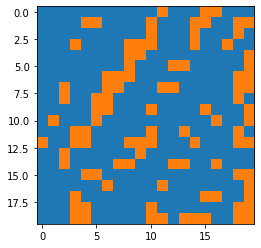

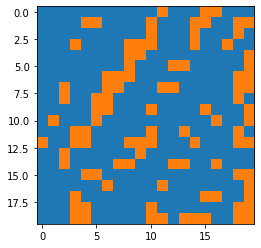

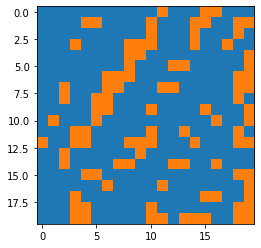

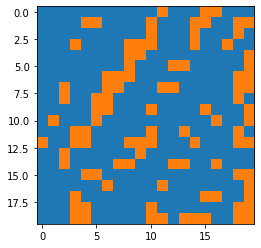

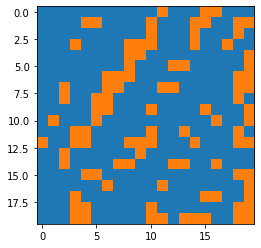

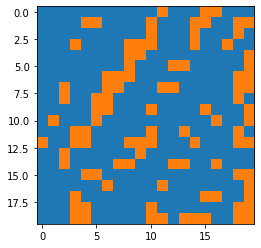

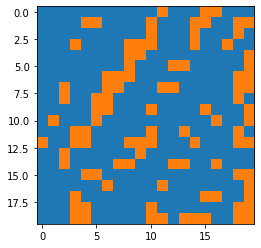

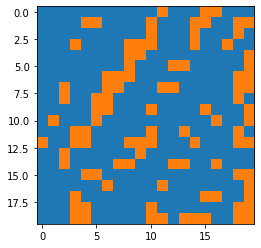

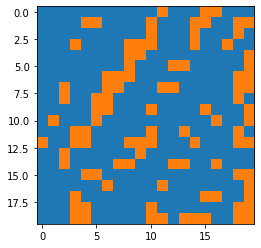

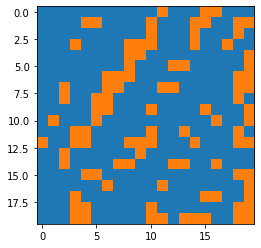

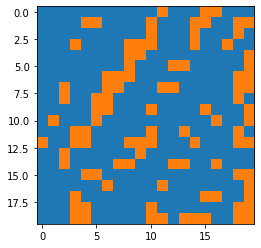

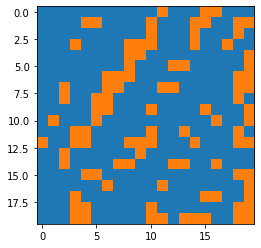

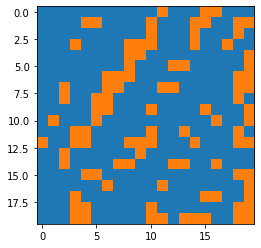

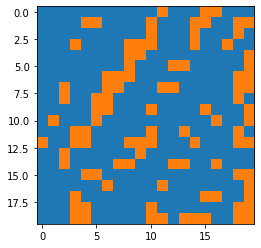

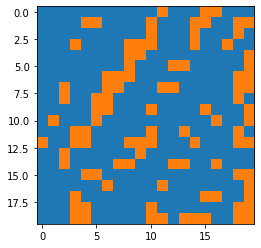

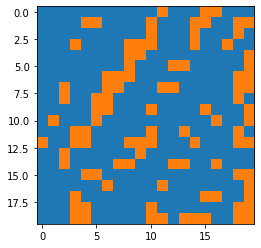

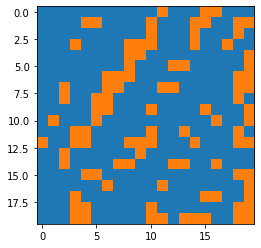

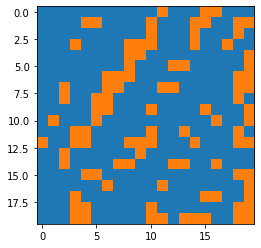

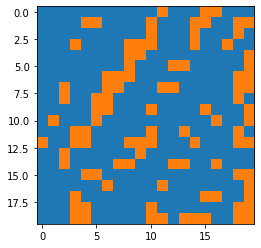

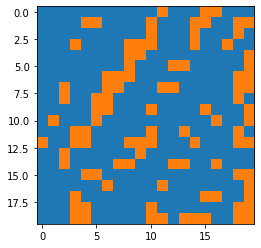

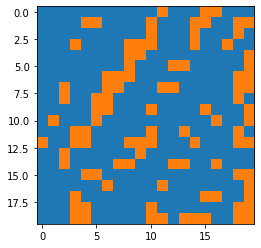

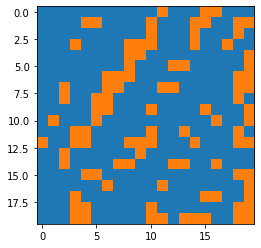

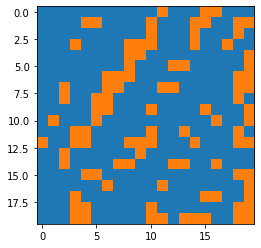

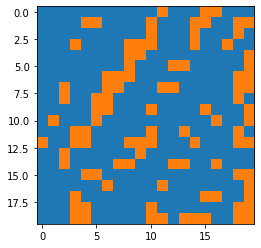

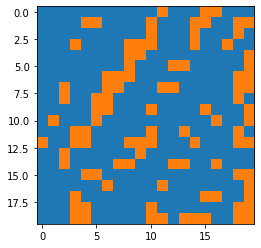

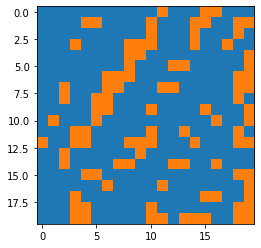

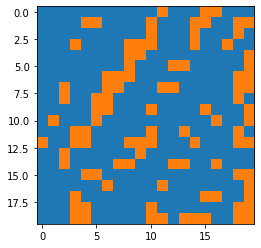

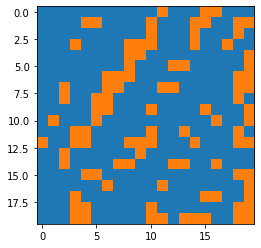

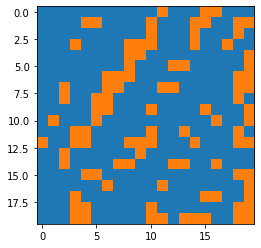

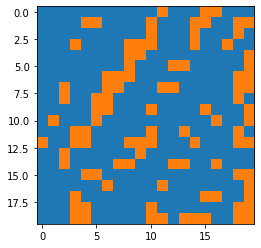

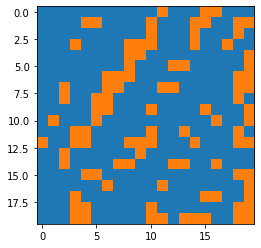

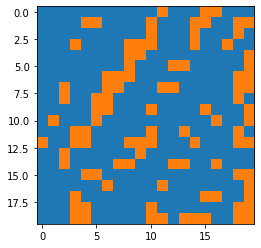

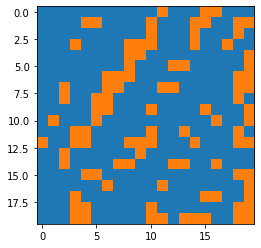

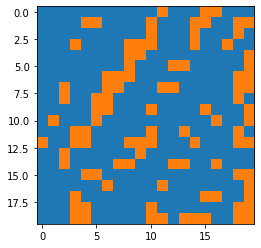

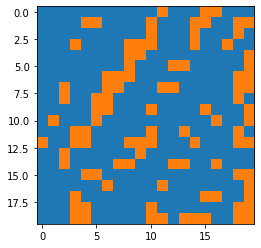

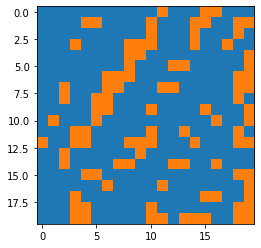

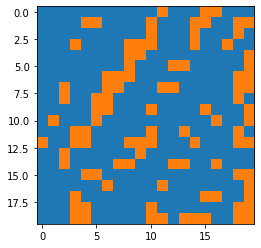

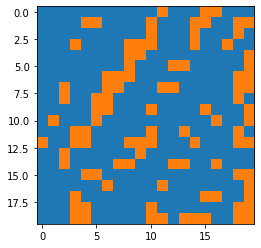

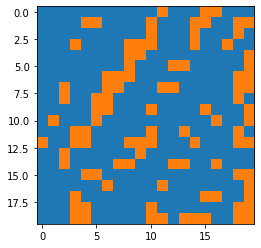

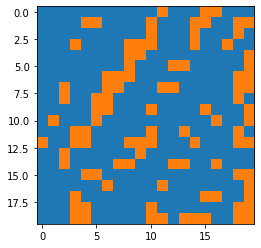

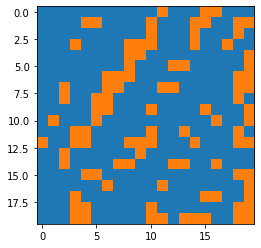

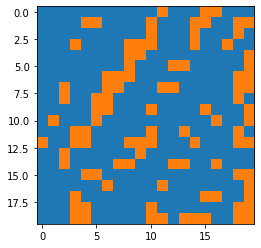

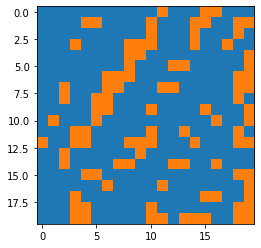

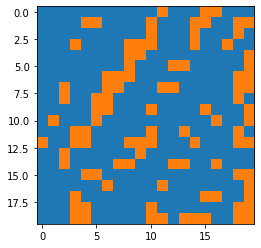

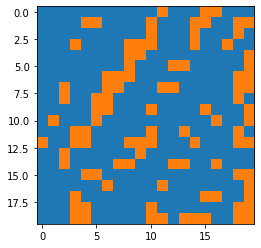

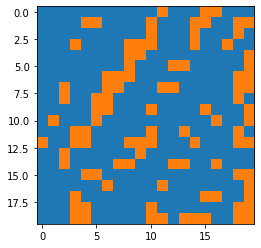

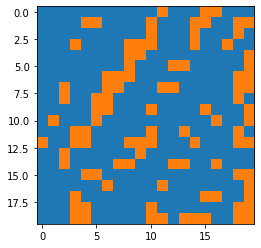

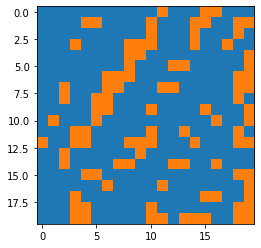

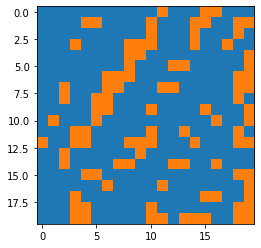

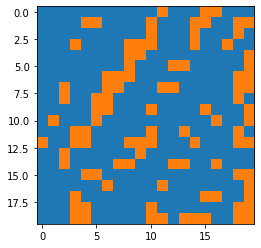

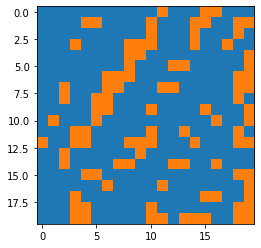

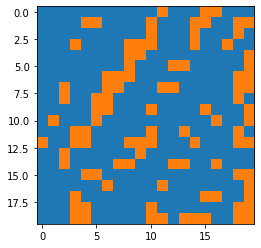

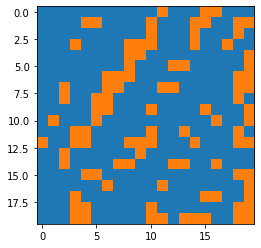

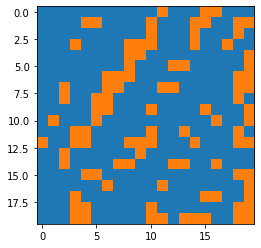

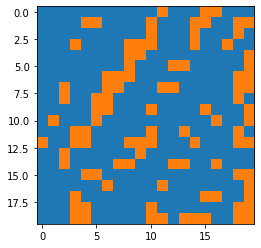

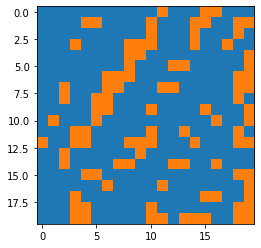

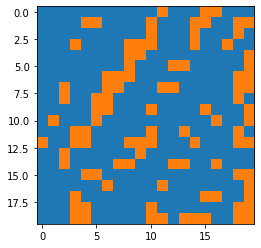

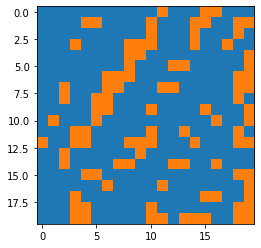

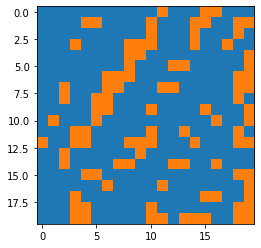

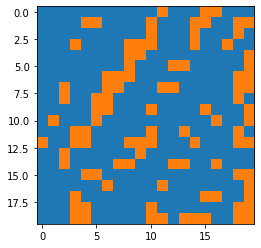

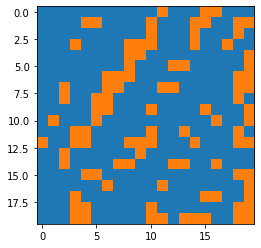

KeyboardInterrupt: 

In [462]:
# Individual coin flips
N_grid = 20
grid = torch.randint(-1, 2,(N_grid, N_grid)).float()

cmap = ListedColormap(["C0", "white", "C1"])
die_rate_predator = 0.01
growth_rate_prey = 0.8

hunt_rate = 0.5

l = torch.nn.Conv2d(1, 1, 5, bias=False, padding=2)

for i in range(10):
    old_grid = grid.clone()
    neighbor_sum = l(grid.unsqueeze(0)).detach().squeeze()

    predator = (grid == 1.).float()
    prey = (grid == -1.).float()

    predator_count = l(predator.unsqueeze(0)).squeeze()
    prey_count = l(prey.unsqueeze(0)).squeeze()



    dead_predator = torch.bernoulli(die_rate_predator*torch.ones_like(grid))* predator
    grid[dead_predator.bool()] = 0.

    new_prey = torch.bernoulli(growth_rate_prey*torch.ones_like(grid)) * (prey_count > 0) * (grid== 0.)
    grid[new_prey.bool()] = -1.

    hunt_rate = torch.bernoulli(hunt_rate*torch.ones_like(grid)) * (prey_count > 0)  * (predator_count > 0) * prey
    grid[hunt_rate.bool()] = 1.






    if (i % 10) == 0:
        plt.imshow(grid, cmap=cmap)
        plt.show()


In [745]:
param = torch.randn(50,6) + torch.tensor([[0.,0.,0.,-2, -2,1]])
param[:,:3] = param[:, :3].softmax(-1)
param[:,:3] = 0.333333
param[:, 3:] = param[:,3:].sigmoid()

param

tensor([[0.3333, 0.3333, 0.3333, 0.0217, 0.0876, 0.6751],
        [0.3333, 0.3333, 0.3333, 0.0616, 0.3624, 0.5037],
        [0.3333, 0.3333, 0.3333, 0.0611, 0.0356, 0.5226],
        [0.3333, 0.3333, 0.3333, 0.0402, 0.1771, 0.5930],
        [0.3333, 0.3333, 0.3333, 0.0288, 0.1747, 0.6200],
        [0.3333, 0.3333, 0.3333, 0.0820, 0.1277, 0.6945],
        [0.3333, 0.3333, 0.3333, 0.1110, 0.2009, 0.8651],
        [0.3333, 0.3333, 0.3333, 0.1176, 0.0357, 0.5593],
        [0.3333, 0.3333, 0.3333, 0.1900, 0.0361, 0.5917],
        [0.3333, 0.3333, 0.3333, 0.1977, 0.2848, 0.8096],
        [0.3333, 0.3333, 0.3333, 0.1755, 0.0856, 0.9143],
        [0.3333, 0.3333, 0.3333, 0.2393, 0.2255, 0.8097],
        [0.3333, 0.3333, 0.3333, 0.4429, 0.0311, 0.6469],
        [0.3333, 0.3333, 0.3333, 0.0771, 0.0875, 0.6936],
        [0.3333, 0.3333, 0.3333, 0.0655, 0.1093, 0.3444],
        [0.3333, 0.3333, 0.3333, 0.1177, 0.2470, 0.6820],
        [0.3333, 0.3333, 0.3333, 0.0256, 0.0596, 0.8690],
        [0.333

In [750]:
# Rock paper scissor
N_grid = 100


cmap = ListedColormap(["white", "C0", "C1", "C2"])


# param[:,:3] = param[:, :3].softmax(-1)
# param[:, 3:] = param[:,3:].sigmoid()

batch_shape = param.shape[0]
grid = torch.randint(0, 4,(batch_shape,1,N_grid, N_grid)).float()
A_prior = param[:, 0]
B_prior = param[:, 1]
C_prior = param[:, 2]

death_rate_B_C = param[:, 3]
death_rate_A = param[:, 4]
toxicity_C_to_A = param[:, 5]

l = torch.nn.Conv2d(1, 1, 3, bias=False, padding=1)
l._parameters["weight"].data = torch.ones(1,1,3,3)

for i in range(100):

    empty = (grid == 0.).float()
    As = (grid == 1.).float()
    Bs = (grid == 2.).float()
    Cs = (grid == 3.).float()

    really_empty = l(empty).detach()
    A_neighbor_count = l(As).detach()
    B_neighbor_count = l(Bs).detach()
    C_neighbor_count = l(Cs).detach()

    A_neighbor_count_weighted = A_neighbor_count * A_prior.reshape(-1, 1, 1, 1) + 1e-6
    B_neighbor_count_weighted = B_neighbor_count * B_prior.reshape(-1, 1, 1, 1) + 1e-6
    C_neighbor_count_weighted = C_neighbor_count * C_prior.reshape(-1, 1, 1, 1) + 1e-6


    counts = torch.concat([A_neighbor_count_weighted.unsqueeze(0),B_neighbor_count_weighted.unsqueeze(0),C_neighbor_count_weighted.unsqueeze(0)])


    # For empty cells
    win_prob_by_counts = counts / counts.sum(0, keepdim=True)
    new_grid = torch.distributions.Categorical(win_prob_by_counts.T, validate_args=False).sample().T
    grid[empty.bool()] = new_grid[empty.bool()].float() + 1.
    grid[really_empty == 9.] = 0.

    # Dead B and C
    dead_B = Bs * torch.bernoulli(death_rate_B_C.reshape(-1,1,1,1)*torch.ones_like(Bs))
    grid[dead_B.bool()] = 0.

    dead_C = Cs * torch.bernoulli(death_rate_B_C.reshape(-1,1,1,1)*torch.ones_like(Cs))
    grid[dead_C.bool()] = 0.

    # Dead
    death_prob_A = toxicity_C_to_A.reshape(-1,1,1,1)*C_neighbor_count/9
    dead_A = As * torch.bernoulli(death_prob_A*torch.ones_like(death_prob_A))
    grid[dead_A.bool()] = 0.


In [759]:

prior = torch.distributions.Normal(torch.tensor([0,0,0,-2., -2, 1]), 1.)

def simulator_rps(param, iters=100, N_grid=100):

    param = param.reshape(-1, 6)

    param[:,:3] = param[:, :3].softmax(-1)
    param[:, 3:] = param[:,3:].sigmoid()

    batch_shape = param.shape[0]
    grid = torch.randint(0, 4,(batch_shape,1,N_grid, N_grid)).float()
    A_prior = param[:, 0]
    B_prior = param[:, 1]
    C_prior = param[:, 2]

    death_rate_B_C = param[:, 3]
    death_rate_A = param[:, 4]
    toxicity_C_to_A = param[:, 5]

    l = torch.nn.Conv2d(1, 1, 3, bias=False, padding=1)
    l._parameters["weight"].data = torch.ones(1,1,3,3)

    for i in range(iters):

        empty = (grid == 0.).float()
        As = (grid == 1.).float()
        Bs = (grid == 2.).float()
        Cs = (grid == 3.).float()

        really_empty = l(empty).detach()
        A_neighbor_count = l(As).detach()
        B_neighbor_count = l(Bs).detach()
        C_neighbor_count = l(Cs).detach()

        A_neighbor_count_weighted = A_neighbor_count * A_prior.reshape(-1, 1, 1, 1) + 1e-6
        B_neighbor_count_weighted = B_neighbor_count * B_prior.reshape(-1, 1, 1, 1) + 1e-6
        C_neighbor_count_weighted = C_neighbor_count * C_prior.reshape(-1, 1, 1, 1) + 1e-6


        counts = torch.concat([A_neighbor_count_weighted.unsqueeze(0),B_neighbor_count_weighted.unsqueeze(0),C_neighbor_count_weighted.unsqueeze(0)])


        # For empty cells
        win_prob_by_counts = counts / counts.sum(0, keepdim=True)
        new_grid = torch.distributions.Categorical(win_prob_by_counts.T, validate_args=False).sample().T
        grid[empty.bool()] = new_grid[empty.bool()].float() + 1.
        grid[really_empty == 9.] = 0.

        # Dead B and C
        dead_B = Bs * torch.bernoulli(death_rate_B_C.reshape(-1,1,1,1)*torch.ones_like(Bs))
        grid[dead_B.bool()] = 0.

        dead_C = Cs * torch.bernoulli(death_rate_B_C.reshape(-1,1,1,1)*torch.ones_like(Cs))
        grid[dead_C.bool()] = 0.

        # Dead
        death_prob_A = toxicity_C_to_A.reshape(-1,1,1,1)*C_neighbor_count/9
        dead_A = As * torch.bernoulli(death_prob_A*torch.ones_like(death_prob_A))
        grid[dead_A.bool()] = 0.
    return grid


In [764]:
thetas = prior.sample((20,))

grid = simulator_rps(thetas, N_grid=80)

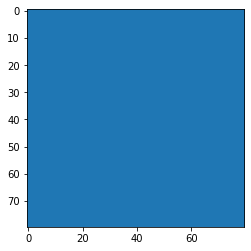

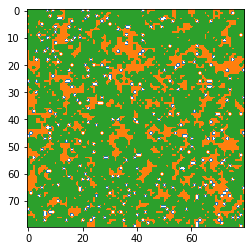

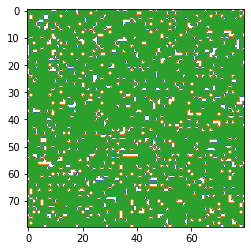

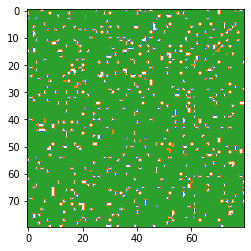

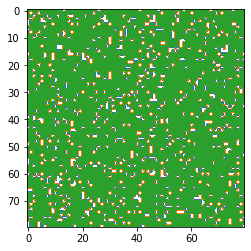

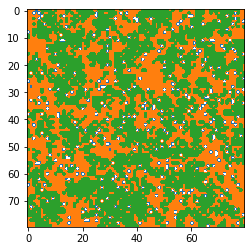

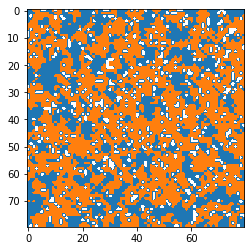

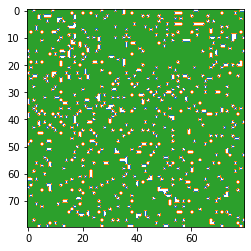

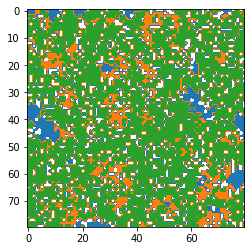

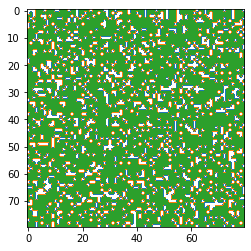

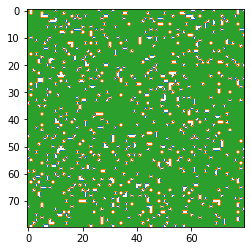

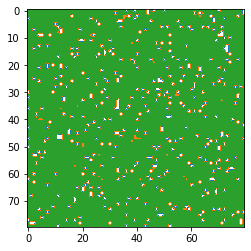

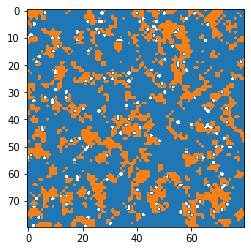

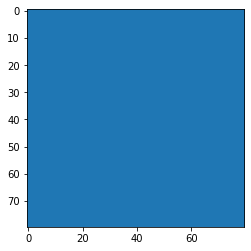

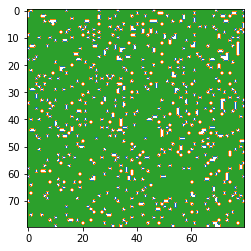

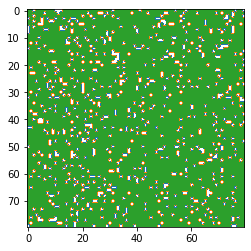

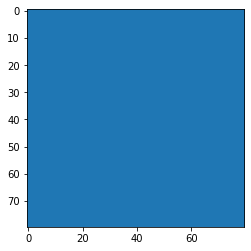

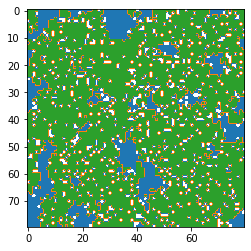

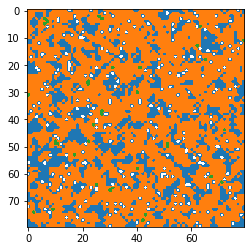

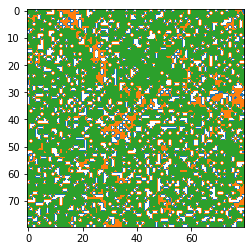

In [765]:
for g in grid:
    plt.imshow(g.squeeze(), cmap=cmap, vmin=0., vmax=3)
    plt.show()

In [648]:
C_neighbor_count.shape

torch.Size([10, 100, 100])

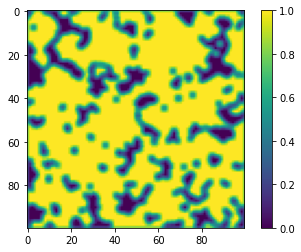

In [285]:
plt.imshow((neighbor_sum + 9) / 18)
plt.colorbar()

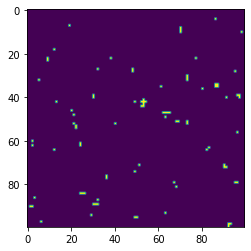

In [206]:
plt.imshow(neighbor_sum < -5)

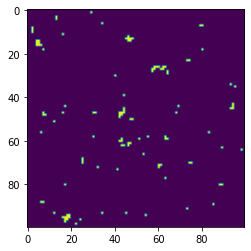

In [207]:
plt.imshow(neighbor_sum > 5)